In [1]:
from scipy import stats
# ^^^ pyforest auto-imports - don't write above this line
import pandas as pd
import numpy as np

c:\Users\92310\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv("./gaarna.csv")
df.head()

,Price,total_area,url,beds,baths,garage,location,date
0,PKR 2.5 lac,1 Kanal House for Rent,https://www.graana.com/property/islamabad-dha-...,5,5,2,DHA Phase 2 Islamabad,April 11 2022
1,PKR 95000,1300 Sqft Apartment for Rent,https://www.graana.com/property/islamabad-bahr...,2,2,0,Bahria Town Phase 4 Islamabad,April 11 2022
2,PKR 80000,860 Sqft Apartment for Rent,https://www.graana.com/property/islamabad-bahr...,1,1,0,Bahria Town Phase 4 Islamabad,April 11 2022
3,PKR 2 lac,1 Kanal House for Rent,https://www.graana.com/property/islamabad-dha-...,5,5,2,DHA Phase 2 Islamabad,April 11 2022
4,PKR 1 lac,1 Kanal Lower Portion for Rent,https://www.graana.com/property/islamabad-g-13...,3,3,2,G-13/4 Islamabad,April 11 2022


In [3]:
df[['A', 'B']] = df['Price'].str.split(' ', 1, expand=True)

C:\Users\92310\AppData\Local\Temp\ipykernel_4060\3055299026.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['A', 'B']] = df['Price'].str.split(' ', 1, expand=True)


In [4]:
df.head(5)

,Price,total_area,url,beds,baths,garage,location,date,A,B
0,PKR 2.5 lac,1 Kanal House for Rent,https://www.graana.com/property/islamabad-dha-...,5,5,2,DHA Phase 2 Islamabad,April 11 2022,PKR,2.5 lac
1,PKR 95000,1300 Sqft Apartment for Rent,https://www.graana.com/property/islamabad-bahr...,2,2,0,Bahria Town Phase 4 Islamabad,April 11 2022,PKR,95000
2,PKR 80000,860 Sqft Apartment for Rent,https://www.graana.com/property/islamabad-bahr...,1,1,0,Bahria Town Phase 4 Islamabad,April 11 2022,PKR,80000
3,PKR 2 lac,1 Kanal House for Rent,https://www.graana.com/property/islamabad-dha-...,5,5,2,DHA Phase 2 Islamabad,April 11 2022,PKR,2 lac
4,PKR 1 lac,1 Kanal Lower Portion for Rent,https://www.graana.com/property/islamabad-g-13...,3,3,2,G-13/4 Islamabad,April 11 2022,PKR,1 lac


In [5]:
df[['C', 'D']] = df['B'].str.split(' ', 1, expand=True)

C:\Users\92310\AppData\Local\Temp\ipykernel_4060\2854014029.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['C', 'D']] = df['B'].str.split(' ', 1, expand=True)


In [6]:
df.head(5)

,Price,total_area,url,beds,baths,garage,location,date,A,B,C,D
0,PKR 2.5 lac,1 Kanal House for Rent,https://www.graana.com/property/islamabad-dha-...,5,5,2,DHA Phase 2 Islamabad,April 11 2022,PKR,2.5 lac,2.5,lac
1,PKR 95000,1300 Sqft Apartment for Rent,https://www.graana.com/property/islamabad-bahr...,2,2,0,Bahria Town Phase 4 Islamabad,April 11 2022,PKR,95000,95000,None
2,PKR 80000,860 Sqft Apartment for Rent,https://www.graana.com/property/islamabad-bahr...,1,1,0,Bahria Town Phase 4 Islamabad,April 11 2022,PKR,80000,80000,None
3,PKR 2 lac,1 Kanal House for Rent,https://www.graana.com/property/islamabad-dha-...,5,5,2,DHA Phase 2 Islamabad,April 11 2022,PKR,2 lac,2,lac
4,PKR 1 lac,1 Kanal Lower Portion for Rent,https://www.graana.com/property/islamabad-g-13...,3,3,2,G-13/4 Islamabad,April 11 2022,PKR,1 lac,1,lac


In [7]:
df.D.unique()

array(['lac', None], dtype=object)

In [8]:
def trans_price(x):
    if x=='lac':
        return 100000
    if x=='None':
        return 1


In [9]:
df['convert']= df['D'].apply(trans_price).astype(float)
df.head(10)

,Price,total_area,url,beds,baths,garage,location,date,A,B,C,D,convert
0,PKR 2.5 lac,1 Kanal House for Rent,https://www.graana.com/property/islamabad-dha-...,5,5,2,DHA Phase 2 Islamabad,April 11 2022,PKR,2.5 lac,2.5,lac,100000.0
1,PKR 95000,1300 Sqft Apartment for Rent,https://www.graana.com/property/islamabad-bahr...,2,2,0,Bahria Town Phase 4 Islamabad,April 11 2022,PKR,95000,95000,None,NaN
2,PKR 80000,860 Sqft Apartment for Rent,https://www.graana.com/property/islamabad-bahr...,1,1,0,Bahria Town Phase 4 Islamabad,April 11 2022,PKR,80000,80000,None,NaN
3,PKR 2 lac,1 Kanal House for Rent,https://www.graana.com/property/islamabad-dha-...,5,5,2,DHA Phase 2 Islamabad,April 11 2022,PKR,2 lac,2,lac,100000.0
4,PKR 1 lac,1 Kanal Lower Portion for Rent,https://www.graana.com/property/islamabad-g-13...,3,3,2,G-13/4 Islamabad,April 11 2022,PKR,1 lac,1,lac,100000.0
5,PKR 2.5 lac,1 Kanal Upper portion for Rent,https://www.graana.com/property/islamabad-dha-...,3,3,1,DHA Phase 2 Islamabad,April 11 2022,PKR,2.5 lac,2.5,lac,100000.0
6,PKR 2.5 lac,1 Kanal House for Rent,https://www.graana.com/property/islamabad-dha-...,5,5,2,DHA Phase 2 Islamabad,April 11 2022,PKR,2.5 lac,2.5,lac,100000.0
7,PKR 1.2 lac,1 Kanal Lower Portion for Rent,https://www.graana.com/property/islamabad-g-11...,3,3,1,G-11/3 Islamabad,April 11 2022,PKR,1.2 lac,1.2,lac,100000.0
8,PKR 55000,6 Marla Lower Portion for Rent,https://www.graana.com/property/islamabad-g-11...,2,2,0,G-11/1 Islamabad,April 11 2022,PKR,55000,55000,None,NaN
9,PKR 80000,5 Marla House for Rent,https://www.graana.com/property/islamabad-bahr...,3,4,1,Bahria Enclave Islamabad,April 11 2022,PKR,80000,80000,None,NaN


In [10]:
df['Price_con'] = df['convert'].fillna(1)

In [11]:
df.head(5)

,Price,total_area,url,beds,baths,garage,location,date,A,B,C,D,convert,Price_con
0,PKR 2.5 lac,1 Kanal House for Rent,https://www.graana.com/property/islamabad-dha-...,5,5,2,DHA Phase 2 Islamabad,April 11 2022,PKR,2.5 lac,2.5,lac,100000.0,100000.0
1,PKR 95000,1300 Sqft Apartment for Rent,https://www.graana.com/property/islamabad-bahr...,2,2,0,Bahria Town Phase 4 Islamabad,April 11 2022,PKR,95000,95000,None,NaN,1.0
2,PKR 80000,860 Sqft Apartment for Rent,https://www.graana.com/property/islamabad-bahr...,1,1,0,Bahria Town Phase 4 Islamabad,April 11 2022,PKR,80000,80000,None,NaN,1.0
3,PKR 2 lac,1 Kanal House for Rent,https://www.graana.com/property/islamabad-dha-...,5,5,2,DHA Phase 2 Islamabad,April 11 2022,PKR,2 lac,2,lac,100000.0,100000.0
4,PKR 1 lac,1 Kanal Lower Portion for Rent,https://www.graana.com/property/islamabad-g-13...,3,3,2,G-13/4 Islamabad,April 11 2022,PKR,1 lac,1,lac,100000.0,100000.0


In [12]:
df['Number']=df['C'].astype(float)

In [13]:
df.head(7)

,Price,total_area,url,beds,baths,garage,location,date,A,B,C,D,convert,Price_con,Number
0,PKR 2.5 lac,1 Kanal House for Rent,https://www.graana.com/property/islamabad-dha-...,5,5,2,DHA Phase 2 Islamabad,April 11 2022,PKR,2.5 lac,2.5,lac,100000.0,100000.0,2.5
1,PKR 95000,1300 Sqft Apartment for Rent,https://www.graana.com/property/islamabad-bahr...,2,2,0,Bahria Town Phase 4 Islamabad,April 11 2022,PKR,95000,95000,None,NaN,1.0,95000.0
2,PKR 80000,860 Sqft Apartment for Rent,https://www.graana.com/property/islamabad-bahr...,1,1,0,Bahria Town Phase 4 Islamabad,April 11 2022,PKR,80000,80000,None,NaN,1.0,80000.0
3,PKR 2 lac,1 Kanal House for Rent,https://www.graana.com/property/islamabad-dha-...,5,5,2,DHA Phase 2 Islamabad,April 11 2022,PKR,2 lac,2,lac,100000.0,100000.0,2.0
4,PKR 1 lac,1 Kanal Lower Portion for Rent,https://www.graana.com/property/islamabad-g-13...,3,3,2,G-13/4 Islamabad,April 11 2022,PKR,1 lac,1,lac,100000.0,100000.0,1.0
5,PKR 2.5 lac,1 Kanal Upper portion for Rent,https://www.graana.com/property/islamabad-dha-...,3,3,1,DHA Phase 2 Islamabad,April 11 2022,PKR,2.5 lac,2.5,lac,100000.0,100000.0,2.5
6,PKR 2.5 lac,1 Kanal House for Rent,https://www.graana.com/property/islamabad-dha-...,5,5,2,DHA Phase 2 Islamabad,April 11 2022,PKR,2.5 lac,2.5,lac,100000.0,100000.0,2.5


In [14]:
df['Price_']=(df['Number']* df['Price_con']).astype(int)

In [15]:
df.head(5)

,Price,total_area,url,beds,baths,garage,location,date,A,B,C,D,convert,Price_con,Number,Price_
0,PKR 2.5 lac,1 Kanal House for Rent,https://www.graana.com/property/islamabad-dha-...,5,5,2,DHA Phase 2 Islamabad,April 11 2022,PKR,2.5 lac,2.5,lac,100000.0,100000.0,2.5,250000
1,PKR 95000,1300 Sqft Apartment for Rent,https://www.graana.com/property/islamabad-bahr...,2,2,0,Bahria Town Phase 4 Islamabad,April 11 2022,PKR,95000,95000,None,NaN,1.0,95000.0,95000
2,PKR 80000,860 Sqft Apartment for Rent,https://www.graana.com/property/islamabad-bahr...,1,1,0,Bahria Town Phase 4 Islamabad,April 11 2022,PKR,80000,80000,None,NaN,1.0,80000.0,80000
3,PKR 2 lac,1 Kanal House for Rent,https://www.graana.com/property/islamabad-dha-...,5,5,2,DHA Phase 2 Islamabad,April 11 2022,PKR,2 lac,2,lac,100000.0,100000.0,2.0,200000
4,PKR 1 lac,1 Kanal Lower Portion for Rent,https://www.graana.com/property/islamabad-g-13...,3,3,2,G-13/4 Islamabad,April 11 2022,PKR,1 lac,1,lac,100000.0,100000.0,1.0,100000


In [16]:
df1=df.drop(['A','B','C','D','Price_con','Number', 'convert','Price'], axis=1)
df1.head()

,total_area,url,beds,baths,garage,location,date,Price_
0,1 Kanal House for Rent,https://www.graana.com/property/islamabad-dha-...,5,5,2,DHA Phase 2 Islamabad,April 11 2022,250000
1,1300 Sqft Apartment for Rent,https://www.graana.com/property/islamabad-bahr...,2,2,0,Bahria Town Phase 4 Islamabad,April 11 2022,95000
2,860 Sqft Apartment for Rent,https://www.graana.com/property/islamabad-bahr...,1,1,0,Bahria Town Phase 4 Islamabad,April 11 2022,80000
3,1 Kanal House for Rent,https://www.graana.com/property/islamabad-dha-...,5,5,2,DHA Phase 2 Islamabad,April 11 2022,200000
4,1 Kanal Lower Portion for Rent,https://www.graana.com/property/islamabad-g-13...,3,3,2,G-13/4 Islamabad,April 11 2022,100000


In [17]:
df1[['A', 'B']] = df1['location'].str.split('Islamabad', 1, expand=True)

C:\Users\92310\AppData\Local\Temp\ipykernel_4060\664083053.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df1[['A', 'B']] = df1['location'].str.split('Islamabad', 1, expand=True)


In [18]:
df1.head(7)

,total_area,url,beds,baths,garage,location,date,Price_,A,B
0,1 Kanal House for Rent,https://www.graana.com/property/islamabad-dha-...,5,5,2,DHA Phase 2 Islamabad,April 11 2022,250000,DHA Phase 2,
1,1300 Sqft Apartment for Rent,https://www.graana.com/property/islamabad-bahr...,2,2,0,Bahria Town Phase 4 Islamabad,April 11 2022,95000,Bahria Town Phase 4,
2,860 Sqft Apartment for Rent,https://www.graana.com/property/islamabad-bahr...,1,1,0,Bahria Town Phase 4 Islamabad,April 11 2022,80000,Bahria Town Phase 4,
3,1 Kanal House for Rent,https://www.graana.com/property/islamabad-dha-...,5,5,2,DHA Phase 2 Islamabad,April 11 2022,200000,DHA Phase 2,
4,1 Kanal Lower Portion for Rent,https://www.graana.com/property/islamabad-g-13...,3,3,2,G-13/4 Islamabad,April 11 2022,100000,G-13/4,
5,1 Kanal Upper portion for Rent,https://www.graana.com/property/islamabad-dha-...,3,3,1,DHA Phase 2 Islamabad,April 11 2022,250000,DHA Phase 2,
6,1 Kanal House for Rent,https://www.graana.com/property/islamabad-dha-...,5,5,2,DHA Phase 2 Islamabad,April 11 2022,250000,DHA Phase 2,


In [19]:
df1.drop('B', axis=1, inplace=True)

In [20]:
df1.head(5)

,total_area,url,beds,baths,garage,location,date,Price_,A
0,1 Kanal House for Rent,https://www.graana.com/property/islamabad-dha-...,5,5,2,DHA Phase 2 Islamabad,April 11 2022,250000,DHA Phase 2
1,1300 Sqft Apartment for Rent,https://www.graana.com/property/islamabad-bahr...,2,2,0,Bahria Town Phase 4 Islamabad,April 11 2022,95000,Bahria Town Phase 4
2,860 Sqft Apartment for Rent,https://www.graana.com/property/islamabad-bahr...,1,1,0,Bahria Town Phase 4 Islamabad,April 11 2022,80000,Bahria Town Phase 4
3,1 Kanal House for Rent,https://www.graana.com/property/islamabad-dha-...,5,5,2,DHA Phase 2 Islamabad,April 11 2022,200000,DHA Phase 2
4,1 Kanal Lower Portion for Rent,https://www.graana.com/property/islamabad-g-13...,3,3,2,G-13/4 Islamabad,April 11 2022,100000,G-13/4


In [21]:
df1[['B', 'C']] = df['total_area'].str.split('for', 1, expand=True)
df1.head()

C:\Users\92310\AppData\Local\Temp\ipykernel_4060\1916015940.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df1[['B', 'C']] = df['total_area'].str.split('for', 1, expand=True)


,total_area,url,beds,baths,garage,location,date,Price_,A,B,C
0,1 Kanal House for Rent,https://www.graana.com/property/islamabad-dha-...,5,5,2,DHA Phase 2 Islamabad,April 11 2022,250000,DHA Phase 2,1 Kanal House,Rent
1,1300 Sqft Apartment for Rent,https://www.graana.com/property/islamabad-bahr...,2,2,0,Bahria Town Phase 4 Islamabad,April 11 2022,95000,Bahria Town Phase 4,1300 Sqft Apartment,Rent
2,860 Sqft Apartment for Rent,https://www.graana.com/property/islamabad-bahr...,1,1,0,Bahria Town Phase 4 Islamabad,April 11 2022,80000,Bahria Town Phase 4,860 Sqft Apartment,Rent
3,1 Kanal House for Rent,https://www.graana.com/property/islamabad-dha-...,5,5,2,DHA Phase 2 Islamabad,April 11 2022,200000,DHA Phase 2,1 Kanal House,Rent
4,1 Kanal Lower Portion for Rent,https://www.graana.com/property/islamabad-g-13...,3,3,2,G-13/4 Islamabad,April 11 2022,100000,G-13/4,1 Kanal Lower Portion,Rent


In [22]:
df1.head(20)

,total_area,url,beds,baths,garage,location,date,Price_,A,B,C
0,1 Kanal House for Rent,https://www.graana.com/property/islamabad-dha-...,5,5,2,DHA Phase 2 Islamabad,April 11 2022,250000,DHA Phase 2,1 Kanal House,Rent
1,1300 Sqft Apartment for Rent,https://www.graana.com/property/islamabad-bahr...,2,2,0,Bahria Town Phase 4 Islamabad,April 11 2022,95000,Bahria Town Phase 4,1300 Sqft Apartment,Rent
2,860 Sqft Apartment for Rent,https://www.graana.com/property/islamabad-bahr...,1,1,0,Bahria Town Phase 4 Islamabad,April 11 2022,80000,Bahria Town Phase 4,860 Sqft Apartment,Rent
3,1 Kanal House for Rent,https://www.graana.com/property/islamabad-dha-...,5,5,2,DHA Phase 2 Islamabad,April 11 2022,200000,DHA Phase 2,1 Kanal House,Rent
4,1 Kanal Lower Portion for Rent,https://www.graana.com/property/islamabad-g-13...,3,3,2,G-13/4 Islamabad,April 11 2022,100000,G-13/4,1 Kanal Lower Portion,Rent
5,1 Kanal Upper portion for Rent,https://www.graana.com/property/islamabad-dha-...,3,3,1,DHA Phase 2 Islamabad,April 11 2022,250000,DHA Phase 2,1 Kanal Upper portion,Rent
6,1 Kanal House for Rent,https://www.graana.com/property/islamabad-dha-...,5,5,2,DHA Phase 2 Islamabad,April 11 2022,250000,DHA Phase 2,1 Kanal House,Rent
7,1 Kanal Lower Portion for Rent,https://www.graana.com/property/islamabad-g-11...,3,3,1,G-11/3 Islamabad,April 11 2022,120000,G-11/3,1 Kanal Lower Portion,Rent
8,6 Marla Lower Portion for Rent,https://www.graana.com/property/islamabad-g-11...,2,2,0,G-11/1 Islamabad,April 11 2022,55000,G-11/1,6 Marla Lower Portion,Rent
9,5 Marla House for Rent,https://www.graana.com/property/islamabad-bahr...,3,4,1,Bahria Enclave Islamabad,April 11 2022,80000,Bahria Enclave,5 Marla House,Rent


In [23]:
df1[['D', 'E']] = df1['B'].str.split(' ', 1, expand=True)
df1.head()

C:\Users\92310\AppData\Local\Temp\ipykernel_4060\3058446604.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df1[['D', 'E']] = df1['B'].str.split(' ', 1, expand=True)


,total_area,url,beds,baths,garage,location,date,Price_,A,B,C,D,E
0,1 Kanal House for Rent,https://www.graana.com/property/islamabad-dha-...,5,5,2,DHA Phase 2 Islamabad,April 11 2022,250000,DHA Phase 2,1 Kanal House,Rent,1,Kanal House
1,1300 Sqft Apartment for Rent,https://www.graana.com/property/islamabad-bahr...,2,2,0,Bahria Town Phase 4 Islamabad,April 11 2022,95000,Bahria Town Phase 4,1300 Sqft Apartment,Rent,1300,Sqft Apartment
2,860 Sqft Apartment for Rent,https://www.graana.com/property/islamabad-bahr...,1,1,0,Bahria Town Phase 4 Islamabad,April 11 2022,80000,Bahria Town Phase 4,860 Sqft Apartment,Rent,860,Sqft Apartment
3,1 Kanal House for Rent,https://www.graana.com/property/islamabad-dha-...,5,5,2,DHA Phase 2 Islamabad,April 11 2022,200000,DHA Phase 2,1 Kanal House,Rent,1,Kanal House
4,1 Kanal Lower Portion for Rent,https://www.graana.com/property/islamabad-g-13...,3,3,2,G-13/4 Islamabad,April 11 2022,100000,G-13/4,1 Kanal Lower Portion,Rent,1,Kanal Lower Portion


In [24]:
df1[['F', 'G']] = df1['E'].str.split(' ', 1, expand=True)
df1.head()

C:\Users\92310\AppData\Local\Temp\ipykernel_4060\902932260.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df1[['F', 'G']] = df1['E'].str.split(' ', 1, expand=True)


,total_area,url,beds,baths,garage,location,date,Price_,A,B,C,D,E,F,G
0,1 Kanal House for Rent,https://www.graana.com/property/islamabad-dha-...,5,5,2,DHA Phase 2 Islamabad,April 11 2022,250000,DHA Phase 2,1 Kanal House,Rent,1,Kanal House,Kanal,House
1,1300 Sqft Apartment for Rent,https://www.graana.com/property/islamabad-bahr...,2,2,0,Bahria Town Phase 4 Islamabad,April 11 2022,95000,Bahria Town Phase 4,1300 Sqft Apartment,Rent,1300,Sqft Apartment,Sqft,Apartment
2,860 Sqft Apartment for Rent,https://www.graana.com/property/islamabad-bahr...,1,1,0,Bahria Town Phase 4 Islamabad,April 11 2022,80000,Bahria Town Phase 4,860 Sqft Apartment,Rent,860,Sqft Apartment,Sqft,Apartment
3,1 Kanal House for Rent,https://www.graana.com/property/islamabad-dha-...,5,5,2,DHA Phase 2 Islamabad,April 11 2022,200000,DHA Phase 2,1 Kanal House,Rent,1,Kanal House,Kanal,House
4,1 Kanal Lower Portion for Rent,https://www.graana.com/property/islamabad-g-13...,3,3,2,G-13/4 Islamabad,April 11 2022,100000,G-13/4,1 Kanal Lower Portion,Rent,1,Kanal Lower Portion,Kanal,Lower Portion


In [26]:
df1.to_csv("./gaarna.csv")

In [27]:
df1.F.unique()

array(['Kanal', 'Sqft', 'Marla', 'Sq.', 'Sqyd', 'Sq.Yd.', 'marla',
       'kanal', '', 'SqFt', 'sqft', 'Portion'], dtype=object)

In [28]:
def sqft_conversion(x):
    if x>272:
        return x / 272.251
    else: 
        return x

In [29]:
df1.D.unique()

array(['1', '1300', '860', '6', '5', '810', '10', '1400', '9', '2150',
       '1250', '1750', '7', '1000', '500', '930', '4', '814', '1170',
       '1950', '1700', '1150', '2400', '700', '3000', '1500', '12', '14',
       '18', '2', '666', '444', '450', '1550', '2240', '8', '400', '1.3',
       '460', '950', '850', '1066', '1600', '635', '1050', '900', '1022',
       '20', '800', '2000', '1800', '1200', '1100', '600', '1330', '730',
       '1120', '533', '16', '511', '1.2', '550', '1900', '3', '1618',
       '1612', '4.5', '1.5', '26', '602', '1350', '4500', '2.2', '750',
       '1545', '2250', '933', '650', '804', '120', '4.4', '10.7', '147',
       '300', '765', '2500', '675', 'House', '1175', '3700', '225', '760',
       '6.6', '888', '735', '725', '14.5', '15', 'Lower', '11', '13',
       '733'], dtype=object)

In [30]:
df1=df1.replace(to_replace="Newly",value="500")
df1=df1.replace(to_replace="House",value="10")
df1=df1.replace(to_replace="Lower",value="500")
df1=df1.replace(to_replace="lac",value="500")

#mymap = {'Newly': 500, 'House': 10, 'Lower':500 }
#df1.D.applymap(lambda s: mymap.get(s) if s in mymap else s)

In [31]:
df1[['col1']] = df1[['D']].replace('(-?[^\d\.])', '', regex=True).replace('', float('NaN')).astype(float)

In [32]:
df1['convert']= df1['col1'].apply(sqft_conversion).astype(float)
df1.head(10)

,total_area,url,beds,baths,garage,location,date,Price_,A,B,C,D,E,F,G,col1,convert
0,1 Kanal House for Rent,https://www.graana.com/property/islamabad-dha-...,5,5,2,DHA Phase 2 Islamabad,April 11 2022,250000,DHA Phase 2,1 Kanal House,Rent,1,Kanal House,Kanal,House,1.0,1.000000
1,1300 Sqft Apartment for Rent,https://www.graana.com/property/islamabad-bahr...,2,2,0,Bahria Town Phase 4 Islamabad,April 11 2022,95000,Bahria Town Phase 4,1300 Sqft Apartment,Rent,1300,Sqft Apartment,Sqft,Apartment,1300.0,4.775005
2,860 Sqft Apartment for Rent,https://www.graana.com/property/islamabad-bahr...,1,1,0,Bahria Town Phase 4 Islamabad,April 11 2022,80000,Bahria Town Phase 4,860 Sqft Apartment,Rent,860,Sqft Apartment,Sqft,Apartment,860.0,3.158850
3,1 Kanal House for Rent,https://www.graana.com/property/islamabad-dha-...,5,5,2,DHA Phase 2 Islamabad,April 11 2022,200000,DHA Phase 2,1 Kanal House,Rent,1,Kanal House,Kanal,House,1.0,1.000000
4,1 Kanal Lower Portion for Rent,https://www.graana.com/property/islamabad-g-13...,3,3,2,G-13/4 Islamabad,April 11 2022,100000,G-13/4,1 Kanal Lower Portion,Rent,1,Kanal Lower Portion,Kanal,Lower Portion,1.0,1.000000
5,1 Kanal Upper portion for Rent,https://www.graana.com/property/islamabad-dha-...,3,3,1,DHA Phase 2 Islamabad,April 11 2022,250000,DHA Phase 2,1 Kanal Upper portion,Rent,1,Kanal Upper portion,Kanal,Upper portion,1.0,1.000000
6,1 Kanal House for Rent,https://www.graana.com/property/islamabad-dha-...,5,5,2,DHA Phase 2 Islamabad,April 11 2022,250000,DHA Phase 2,1 Kanal House,Rent,1,Kanal House,Kanal,House,1.0,1.000000
7,1 Kanal Lower Portion for Rent,https://www.graana.com/property/islamabad-g-11...,3,3,1,G-11/3 Islamabad,April 11 2022,120000,G-11/3,1 Kanal Lower Portion,Rent,1,Kanal Lower Portion,Kanal,Lower Portion,1.0,1.000000
8,6 Marla Lower Portion for Rent,https://www.graana.com/property/islamabad-g-11...,2,2,0,G-11/1 Islamabad,April 11 2022,55000,G-11/1,6 Marla Lower Portion,Rent,6,Marla Lower Portion,Marla,Lower Portion,6.0,6.000000
9,5 Marla House for Rent,https://www.graana.com/property/islamabad-bahr...,3,4,1,Bahria Enclave Islamabad,April 11 2022,80000,Bahria Enclave,5 Marla House,Rent,5,Marla House,Marla,House,5.0,5.000000


In [33]:
df1.F.unique()

array(['Kanal', 'Sqft', 'Marla', 'Sq.', 'Sqyd', 'Sq.Yd.', 'marla',
       'kanal', '', 'SqFt', 'sqft', 'Portion'], dtype=object)

In [34]:
def trans_area(x):
    if x=='Kanal' or x=='kanal':
        return 20
    if x=='Marla' or x=='marla' or x=='Sqft' or x=='Sq.' or x=='Sqyd'or x=='Constructed' or x=='Sq.Yd.' or x=='SqFt' or x=='sqft' or x=='Portion' or x=='':
        return 1

In [35]:
df1['con_marla']= df1['F'].apply(trans_area).astype(float)
df1.head(10)

,total_area,url,beds,baths,garage,location,date,Price_,A,B,C,D,E,F,G,col1,convert,con_marla
0,1 Kanal House for Rent,https://www.graana.com/property/islamabad-dha-...,5,5,2,DHA Phase 2 Islamabad,April 11 2022,250000,DHA Phase 2,1 Kanal House,Rent,1,Kanal House,Kanal,House,1.0,1.000000,20.0
1,1300 Sqft Apartment for Rent,https://www.graana.com/property/islamabad-bahr...,2,2,0,Bahria Town Phase 4 Islamabad,April 11 2022,95000,Bahria Town Phase 4,1300 Sqft Apartment,Rent,1300,Sqft Apartment,Sqft,Apartment,1300.0,4.775005,1.0
2,860 Sqft Apartment for Rent,https://www.graana.com/property/islamabad-bahr...,1,1,0,Bahria Town Phase 4 Islamabad,April 11 2022,80000,Bahria Town Phase 4,860 Sqft Apartment,Rent,860,Sqft Apartment,Sqft,Apartment,860.0,3.158850,1.0
3,1 Kanal House for Rent,https://www.graana.com/property/islamabad-dha-...,5,5,2,DHA Phase 2 Islamabad,April 11 2022,200000,DHA Phase 2,1 Kanal House,Rent,1,Kanal House,Kanal,House,1.0,1.000000,20.0
4,1 Kanal Lower Portion for Rent,https://www.graana.com/property/islamabad-g-13...,3,3,2,G-13/4 Islamabad,April 11 2022,100000,G-13/4,1 Kanal Lower Portion,Rent,1,Kanal Lower Portion,Kanal,Lower Portion,1.0,1.000000,20.0
5,1 Kanal Upper portion for Rent,https://www.graana.com/property/islamabad-dha-...,3,3,1,DHA Phase 2 Islamabad,April 11 2022,250000,DHA Phase 2,1 Kanal Upper portion,Rent,1,Kanal Upper portion,Kanal,Upper portion,1.0,1.000000,20.0
6,1 Kanal House for Rent,https://www.graana.com/property/islamabad-dha-...,5,5,2,DHA Phase 2 Islamabad,April 11 2022,250000,DHA Phase 2,1 Kanal House,Rent,1,Kanal House,Kanal,House,1.0,1.000000,20.0
7,1 Kanal Lower Portion for Rent,https://www.graana.com/property/islamabad-g-11...,3,3,1,G-11/3 Islamabad,April 11 2022,120000,G-11/3,1 Kanal Lower Portion,Rent,1,Kanal Lower Portion,Kanal,Lower Portion,1.0,1.000000,20.0
8,6 Marla Lower Portion for Rent,https://www.graana.com/property/islamabad-g-11...,2,2,0,G-11/1 Islamabad,April 11 2022,55000,G-11/1,6 Marla Lower Portion,Rent,6,Marla Lower Portion,Marla,Lower Portion,6.0,6.000000,1.0
9,5 Marla House for Rent,https://www.graana.com/property/islamabad-bahr...,3,4,1,Bahria Enclave Islamabad,April 11 2022,80000,Bahria Enclave,5 Marla House,Rent,5,Marla House,Marla,House,5.0,5.000000,1.0


In [36]:
df1["area_marla"] = df1["convert"] *df1['con_marla']

In [37]:
df1.head()

,total_area,url,beds,baths,garage,location,date,Price_,A,B,C,D,E,F,G,col1,convert,con_marla,area_marla
0,1 Kanal House for Rent,https://www.graana.com/property/islamabad-dha-...,5,5,2,DHA Phase 2 Islamabad,April 11 2022,250000,DHA Phase 2,1 Kanal House,Rent,1,Kanal House,Kanal,House,1.0,1.000000,20.0,20.000000
1,1300 Sqft Apartment for Rent,https://www.graana.com/property/islamabad-bahr...,2,2,0,Bahria Town Phase 4 Islamabad,April 11 2022,95000,Bahria Town Phase 4,1300 Sqft Apartment,Rent,1300,Sqft Apartment,Sqft,Apartment,1300.0,4.775005,1.0,4.775005
2,860 Sqft Apartment for Rent,https://www.graana.com/property/islamabad-bahr...,1,1,0,Bahria Town Phase 4 Islamabad,April 11 2022,80000,Bahria Town Phase 4,860 Sqft Apartment,Rent,860,Sqft Apartment,Sqft,Apartment,860.0,3.158850,1.0,3.158850
3,1 Kanal House for Rent,https://www.graana.com/property/islamabad-dha-...,5,5,2,DHA Phase 2 Islamabad,April 11 2022,200000,DHA Phase 2,1 Kanal House,Rent,1,Kanal House,Kanal,House,1.0,1.000000,20.0,20.000000
4,1 Kanal Lower Portion for Rent,https://www.graana.com/property/islamabad-g-13...,3,3,2,G-13/4 Islamabad,April 11 2022,100000,G-13/4,1 Kanal Lower Portion,Rent,1,Kanal Lower Portion,Kanal,Lower Portion,1.0,1.000000,20.0,20.000000


In [38]:
df1=df1.drop(['B','D','D','E','F', 'col1','convert'], axis=1)
df1.head()

,total_area,url,beds,baths,garage,location,date,Price_,A,C,G,con_marla,area_marla
0,1 Kanal House for Rent,https://www.graana.com/property/islamabad-dha-...,5,5,2,DHA Phase 2 Islamabad,April 11 2022,250000,DHA Phase 2,Rent,House,20.0,20.000000
1,1300 Sqft Apartment for Rent,https://www.graana.com/property/islamabad-bahr...,2,2,0,Bahria Town Phase 4 Islamabad,April 11 2022,95000,Bahria Town Phase 4,Rent,Apartment,1.0,4.775005
2,860 Sqft Apartment for Rent,https://www.graana.com/property/islamabad-bahr...,1,1,0,Bahria Town Phase 4 Islamabad,April 11 2022,80000,Bahria Town Phase 4,Rent,Apartment,1.0,3.158850
3,1 Kanal House for Rent,https://www.graana.com/property/islamabad-dha-...,5,5,2,DHA Phase 2 Islamabad,April 11 2022,200000,DHA Phase 2,Rent,House,20.0,20.000000
4,1 Kanal Lower Portion for Rent,https://www.graana.com/property/islamabad-g-13...,3,3,2,G-13/4 Islamabad,April 11 2022,100000,G-13/4,Rent,Lower Portion,20.0,20.000000


In [39]:
df1=df1.drop(['location','total_area'], axis=1)
df1.head()

,url,beds,baths,garage,date,Price_,A,C,G,con_marla,area_marla
0,https://www.graana.com/property/islamabad-dha-...,5,5,2,April 11 2022,250000,DHA Phase 2,Rent,House,20.0,20.000000
1,https://www.graana.com/property/islamabad-bahr...,2,2,0,April 11 2022,95000,Bahria Town Phase 4,Rent,Apartment,1.0,4.775005
2,https://www.graana.com/property/islamabad-bahr...,1,1,0,April 11 2022,80000,Bahria Town Phase 4,Rent,Apartment,1.0,3.158850
3,https://www.graana.com/property/islamabad-dha-...,5,5,2,April 11 2022,200000,DHA Phase 2,Rent,House,20.0,20.000000
4,https://www.graana.com/property/islamabad-g-13...,3,3,2,April 11 2022,100000,G-13/4,Rent,Lower Portion,20.0,20.000000


In [40]:
df1.isna().sum()

url            0
beds           0
baths          0
garage         0
date           0
Price_         0
A              0
C             44
G             35
con_marla      0
area_marla     0
dtype: int64

In [41]:
df1 = df1.dropna(subset=['G'])

In [42]:
df1['area_sqft']= df1["area_marla"]* 272.2

In [43]:
df1.head(4)

,url,beds,baths,garage,date,Price_,A,C,G,con_marla,area_marla,area_sqft
0,https://www.graana.com/property/islamabad-dha-...,5,5,2,April 11 2022,250000,DHA Phase 2,Rent,House,20.0,20.000000,5444.000000
1,https://www.graana.com/property/islamabad-bahr...,2,2,0,April 11 2022,95000,Bahria Town Phase 4,Rent,Apartment,1.0,4.775005,1299.756475
2,https://www.graana.com/property/islamabad-bahr...,1,1,0,April 11 2022,80000,Bahria Town Phase 4,Rent,Apartment,1.0,3.158850,859.838899
3,https://www.graana.com/property/islamabad-dha-...,5,5,2,April 11 2022,200000,DHA Phase 2,Rent,House,20.0,20.000000,5444.000000


In [44]:
header_names=['page_url', 'bedrooms','baths','garage','date','price','location','purpose','property','con_marla','area_marla', 'area_sqft']

In [46]:
df1.to_csv("../Output/data1forrent.csv")

In [48]:
df2=pd.read_csv("../Output/data1forrent.csv",header=None,skiprows=1, names=header_names)
df2.head()

,page_url,bedrooms,baths,garage,date,price,location,purpose,property,con_marla,area_marla,area_sqft
0,https://www.graana.com/property/islamabad-dha-...,5,5,2,April 11 2022,250000,DHA Phase 2,Rent,House,20.0,20.000000,5444.000000
1,https://www.graana.com/property/islamabad-bahr...,2,2,0,April 11 2022,95000,Bahria Town Phase 4,Rent,Apartment,1.0,4.775005,1299.756475
2,https://www.graana.com/property/islamabad-bahr...,1,1,0,April 11 2022,80000,Bahria Town Phase 4,Rent,Apartment,1.0,3.158850,859.838899
3,https://www.graana.com/property/islamabad-dha-...,5,5,2,April 11 2022,200000,DHA Phase 2,Rent,House,20.0,20.000000,5444.000000
4,https://www.graana.com/property/islamabad-g-13...,3,3,2,April 11 2022,100000,G-13/4,Rent,Lower Portion,20.0,20.000000,5444.000000


In [49]:
df2=df2.drop(['purpose','con_marla'], axis=1)
df2.head()

,page_url,bedrooms,baths,garage,date,price,location,property,area_marla,area_sqft
0,https://www.graana.com/property/islamabad-dha-...,5,5,2,April 11 2022,250000,DHA Phase 2,House,20.000000,5444.000000
1,https://www.graana.com/property/islamabad-bahr...,2,2,0,April 11 2022,95000,Bahria Town Phase 4,Apartment,4.775005,1299.756475
2,https://www.graana.com/property/islamabad-bahr...,1,1,0,April 11 2022,80000,Bahria Town Phase 4,Apartment,3.158850,859.838899
3,https://www.graana.com/property/islamabad-dha-...,5,5,2,April 11 2022,200000,DHA Phase 2,House,20.000000,5444.000000
4,https://www.graana.com/property/islamabad-g-13...,3,3,2,April 11 2022,100000,G-13/4,Lower Portion,20.000000,5444.000000


In [50]:
df2.to_csv("../Output/data1forrent.csv")

In [51]:
df3=pd.read_csv("../Output/rentdata.csv")
df3.head()

,Unnamed: 0,page_url,property_type,price,location,city,locality,baths,area,area_marla,area_sqft,bedrooms
0,0,https://www.zameen.com/Property/g_15_g_15_2_g_...,Lower Portion,33000,G-15,Islamabad,"G-15, Islamabad, Islamabad Capital",2,8 Marla,8.0,2178.01,2
1,1,https://www.zameen.com/Property/islamabad_isla...,Lower Portion,17000,Islamabad Expressway,Islamabad,"Islamabad Expressway, Islamabad, Islamabad Cap...",2,5 Marla,5.0,1361.25,2
2,2,https://www.zameen.com/Property/f_6_f_6_1_hous...,Lower Portion,200000,F-6,Islamabad,"F-6, Islamabad, Islamabad Capital",3,16 Marla,16.0,4356.02,3
3,3,https://www.zameen.com/Property/g_8_g_8_2_full...,Lower Portion,60000,G-8,Islamabad,"G-8, Islamabad, Islamabad Capital",2,9.3 Marla,9.3,2531.93,2
4,4,https://www.zameen.com/Property/islamabad_f_10...,Lower Portion,85000,F-10,Islamabad,"F-10, Islamabad, Islamabad Capital",0,1 Kanal,20.0,5445.02,3


In [52]:
df3.drop(df3.columns[df3.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [53]:
df3.head()

,page_url,property_type,price,location,city,locality,baths,area,area_marla,area_sqft,bedrooms
0,https://www.zameen.com/Property/g_15_g_15_2_g_...,Lower Portion,33000,G-15,Islamabad,"G-15, Islamabad, Islamabad Capital",2,8 Marla,8.0,2178.01,2
1,https://www.zameen.com/Property/islamabad_isla...,Lower Portion,17000,Islamabad Expressway,Islamabad,"Islamabad Expressway, Islamabad, Islamabad Cap...",2,5 Marla,5.0,1361.25,2
2,https://www.zameen.com/Property/f_6_f_6_1_hous...,Lower Portion,200000,F-6,Islamabad,"F-6, Islamabad, Islamabad Capital",3,16 Marla,16.0,4356.02,3
3,https://www.zameen.com/Property/g_8_g_8_2_full...,Lower Portion,60000,G-8,Islamabad,"G-8, Islamabad, Islamabad Capital",2,9.3 Marla,9.3,2531.93,2
4,https://www.zameen.com/Property/islamabad_f_10...,Lower Portion,85000,F-10,Islamabad,"F-10, Islamabad, Islamabad Capital",0,1 Kanal,20.0,5445.02,3


In [54]:
df3=df3.drop(['city','locality','area'], axis=1)
df3.head()

,page_url,property_type,price,location,baths,area_marla,area_sqft,bedrooms
0,https://www.zameen.com/Property/g_15_g_15_2_g_...,Lower Portion,33000,G-15,2,8.0,2178.01,2
1,https://www.zameen.com/Property/islamabad_isla...,Lower Portion,17000,Islamabad Expressway,2,5.0,1361.25,2
2,https://www.zameen.com/Property/f_6_f_6_1_hous...,Lower Portion,200000,F-6,3,16.0,4356.02,3
3,https://www.zameen.com/Property/g_8_g_8_2_full...,Lower Portion,60000,G-8,2,9.3,2531.93,2
4,https://www.zameen.com/Property/islamabad_f_10...,Lower Portion,85000,F-10,0,20.0,5445.02,3


In [55]:
def garage_value(x):
    if x>=11 :
        return 2
    if  x>=6:
        if x<=10:
            return 1
    
    if  x<=5:
        return 0

In [56]:
c = np.isinf(df3['area_marla']).values.sum()
c

0

In [57]:
df3.area_marla.isna().sum()

0

In [58]:
df3['garage']= df3['area_marla'].apply(garage_value).astype(float)
df3.head(10)

,page_url,property_type,price,location,baths,area_marla,area_sqft,bedrooms,garage
0,https://www.zameen.com/Property/g_15_g_15_2_g_...,Lower Portion,33000,G-15,2,8.0,2178.01,2,1.0
1,https://www.zameen.com/Property/islamabad_isla...,Lower Portion,17000,Islamabad Expressway,2,5.0,1361.25,2,0.0
2,https://www.zameen.com/Property/f_6_f_6_1_hous...,Lower Portion,200000,F-6,3,16.0,4356.02,3,2.0
3,https://www.zameen.com/Property/g_8_g_8_2_full...,Lower Portion,60000,G-8,2,9.3,2531.93,2,1.0
4,https://www.zameen.com/Property/islamabad_f_10...,Lower Portion,85000,F-10,0,20.0,5445.02,3,2.0
5,https://www.zameen.com/Property/islamabad_f_11...,Lower Portion,110000,F-11,3,26.0,7078.53,3,2.0
6,https://www.zameen.com/Property/islamabad_f_11...,Lower Portion,100000,F-11,3,26.0,7078.53,3,2.0
7,https://www.zameen.com/Property/dha_defence_ph...,Lower Portion,60000,DHA Defence,4,20.0,5445.02,3,2.0
8,https://www.zameen.com/Property/islamabad_f_11...,Lower Portion,110000,F-11,3,24.0,6534.02,3,2.0
9,https://www.zameen.com/Property/f_11_f_11_2_be...,Lower Portion,110000,F-11,3,20.0,5445.02,3,2.0


In [59]:
df3.garage.isnull().sum()

288

In [60]:
df4 = df3.dropna(subset=['garage', 'area_marla'])
df4.head()

,page_url,property_type,price,location,baths,area_marla,area_sqft,bedrooms,garage
0,https://www.zameen.com/Property/g_15_g_15_2_g_...,Lower Portion,33000,G-15,2,8.0,2178.01,2,1.0
1,https://www.zameen.com/Property/islamabad_isla...,Lower Portion,17000,Islamabad Expressway,2,5.0,1361.25,2,0.0
2,https://www.zameen.com/Property/f_6_f_6_1_hous...,Lower Portion,200000,F-6,3,16.0,4356.02,3,2.0
3,https://www.zameen.com/Property/g_8_g_8_2_full...,Lower Portion,60000,G-8,2,9.3,2531.93,2,1.0
4,https://www.zameen.com/Property/islamabad_f_10...,Lower Portion,85000,F-10,0,20.0,5445.02,3,2.0


In [61]:
df4.isna().sum()

page_url         0
property_type    0
price            0
location         0
baths            0
area_marla       0
area_sqft        0
bedrooms         0
garage           0
dtype: int64

In [62]:
df2.head(5)

,page_url,bedrooms,baths,garage,date,price,location,property,area_marla,area_sqft
0,https://www.graana.com/property/islamabad-dha-...,5,5,2,April 11 2022,250000,DHA Phase 2,House,20.000000,5444.000000
1,https://www.graana.com/property/islamabad-bahr...,2,2,0,April 11 2022,95000,Bahria Town Phase 4,Apartment,4.775005,1299.756475
2,https://www.graana.com/property/islamabad-bahr...,1,1,0,April 11 2022,80000,Bahria Town Phase 4,Apartment,3.158850,859.838899
3,https://www.graana.com/property/islamabad-dha-...,5,5,2,April 11 2022,200000,DHA Phase 2,House,20.000000,5444.000000
4,https://www.graana.com/property/islamabad-g-13...,3,3,2,April 11 2022,100000,G-13/4,Lower Portion,20.000000,5444.000000


In [63]:
df2=df2.drop('date', axis=1)
df2.head()

,page_url,bedrooms,baths,garage,price,location,property,area_marla,area_sqft
0,https://www.graana.com/property/islamabad-dha-...,5,5,2,250000,DHA Phase 2,House,20.000000,5444.000000
1,https://www.graana.com/property/islamabad-bahr...,2,2,0,95000,Bahria Town Phase 4,Apartment,4.775005,1299.756475
2,https://www.graana.com/property/islamabad-bahr...,1,1,0,80000,Bahria Town Phase 4,Apartment,3.158850,859.838899
3,https://www.graana.com/property/islamabad-dha-...,5,5,2,200000,DHA Phase 2,House,20.000000,5444.000000
4,https://www.graana.com/property/islamabad-g-13...,3,3,2,100000,G-13/4,Lower Portion,20.000000,5444.000000


In [64]:
df2.head(3)

,page_url,bedrooms,baths,garage,price,location,property,area_marla,area_sqft
0,https://www.graana.com/property/islamabad-dha-...,5,5,2,250000,DHA Phase 2,House,20.000000,5444.000000
1,https://www.graana.com/property/islamabad-bahr...,2,2,0,95000,Bahria Town Phase 4,Apartment,4.775005,1299.756475
2,https://www.graana.com/property/islamabad-bahr...,1,1,0,80000,Bahria Town Phase 4,Apartment,3.158850,859.838899


In [66]:
header_names=['page_url','bedrooms','baths','garage','price','location','property_type','area_marla','area_sqft']
df2.to_csv('../Output/rentdata2.csv')
df5=pd.read_csv("../Output/rentdata2.csv",header=None,skiprows=1, names=header_names)
df5.head()

,page_url,bedrooms,baths,garage,price,location,property_type,area_marla,area_sqft
0,https://www.graana.com/property/islamabad-dha-...,5,5,2,250000,DHA Phase 2,House,20.000000,5444.000000
1,https://www.graana.com/property/islamabad-bahr...,2,2,0,95000,Bahria Town Phase 4,Apartment,4.775005,1299.756475
2,https://www.graana.com/property/islamabad-bahr...,1,1,0,80000,Bahria Town Phase 4,Apartment,3.158850,859.838899
3,https://www.graana.com/property/islamabad-dha-...,5,5,2,200000,DHA Phase 2,House,20.000000,5444.000000
4,https://www.graana.com/property/islamabad-g-13...,3,3,2,100000,G-13/4,Lower Portion,20.000000,5444.000000


In [67]:
df6=pd.concat([df4,df5], ignore_index=True)
df6.head()

,page_url,property_type,price,location,baths,area_marla,area_sqft,bedrooms,garage
0,https://www.zameen.com/Property/g_15_g_15_2_g_...,Lower Portion,33000,G-15,2,8.0,2178.01,2,1.0
1,https://www.zameen.com/Property/islamabad_isla...,Lower Portion,17000,Islamabad Expressway,2,5.0,1361.25,2,0.0
2,https://www.zameen.com/Property/f_6_f_6_1_hous...,Lower Portion,200000,F-6,3,16.0,4356.02,3,2.0
3,https://www.zameen.com/Property/g_8_g_8_2_full...,Lower Portion,60000,G-8,2,9.3,2531.93,2,1.0
4,https://www.zameen.com/Property/islamabad_f_10...,Lower Portion,85000,F-10,0,20.0,5445.02,3,2.0


In [68]:
df6.shape

(15971, 9)

In [69]:
df6.isnull().sum()

page_url         0
property_type    1
price            0
location         0
baths            0
area_marla       0
area_sqft        0
bedrooms         0
garage           0
dtype: int64

In [70]:
df6 = df6.dropna(subset=['property_type'])
df6.head()

,page_url,property_type,price,location,baths,area_marla,area_sqft,bedrooms,garage
0,https://www.zameen.com/Property/g_15_g_15_2_g_...,Lower Portion,33000,G-15,2,8.0,2178.01,2,1.0
1,https://www.zameen.com/Property/islamabad_isla...,Lower Portion,17000,Islamabad Expressway,2,5.0,1361.25,2,0.0
2,https://www.zameen.com/Property/f_6_f_6_1_hous...,Lower Portion,200000,F-6,3,16.0,4356.02,3,2.0
3,https://www.zameen.com/Property/g_8_g_8_2_full...,Lower Portion,60000,G-8,2,9.3,2531.93,2,1.0
4,https://www.zameen.com/Property/islamabad_f_10...,Lower Portion,85000,F-10,0,20.0,5445.02,3,2.0


In [71]:
df6.isnull().sum()

page_url         0
property_type    0
price            0
location         0
baths            0
area_marla       0
area_sqft        0
bedrooms         0
garage           0
dtype: int64

In [72]:
df6.property_type.unique()

array(['Lower Portion', 'Upper Portion', 'House ', 'Apartment ',
       'Lower Portion ', 'Upper portion ', 'Upper Portion ',
       'Ft. Apartment ', 'Furnished Apartment ', 'Basement ',
       'Yd. Upper Portion ', 'Penthouse ', 'Yd. House ',
       'Residential Basement ', 'Ft. House ', 'Ft. Upper Portion ',
       'Room ', 'Farm House ', 'Yd. Lower Portion ', 'Annexe ', 'house ',
       'room ', 'Furnished Annexe ', 'Lower ', 'flat For Rent',
       'House For Rent', 'Upper Portion For Rent',
       'Lower Portion For Rent'], dtype=object)

In [73]:
data= df6.groupby('property_type')

In [74]:
def trans_type(x):
    if x=='Lower Portion' or x=='Lower Portion ' or x=='Lower ' or x=='Yd. Lower Portion ':
        str1='Lower Portion'
        return str1
    if x=='Upper Portion' or x=='Upper portion ' or x=='Upper Portion ' or x=='Yd. Upper Portion ' or x=='Ft. Upper Portion ':
        str2='Upper Portion'
        return str2
    if x=='House ' or x=='Yd. House ' or x=='house ' or x=='Ft. House ':
        str3='House'
        return str3
    

In [75]:
df6['Property']= df6['property_type'].apply(trans_type).astype(str)
df6.head(10)

,page_url,property_type,price,location,baths,area_marla,area_sqft,bedrooms,garage,Property
0,https://www.zameen.com/Property/g_15_g_15_2_g_...,Lower Portion,33000,G-15,2,8.0,2178.01,2,1.0,Lower Portion
1,https://www.zameen.com/Property/islamabad_isla...,Lower Portion,17000,Islamabad Expressway,2,5.0,1361.25,2,0.0,Lower Portion
2,https://www.zameen.com/Property/f_6_f_6_1_hous...,Lower Portion,200000,F-6,3,16.0,4356.02,3,2.0,Lower Portion
3,https://www.zameen.com/Property/g_8_g_8_2_full...,Lower Portion,60000,G-8,2,9.3,2531.93,2,1.0,Lower Portion
4,https://www.zameen.com/Property/islamabad_f_10...,Lower Portion,85000,F-10,0,20.0,5445.02,3,2.0,Lower Portion
5,https://www.zameen.com/Property/islamabad_f_11...,Lower Portion,110000,F-11,3,26.0,7078.53,3,2.0,Lower Portion
6,https://www.zameen.com/Property/islamabad_f_11...,Lower Portion,100000,F-11,3,26.0,7078.53,3,2.0,Lower Portion
7,https://www.zameen.com/Property/dha_defence_ph...,Lower Portion,60000,DHA Defence,4,20.0,5445.02,3,2.0,Lower Portion
8,https://www.zameen.com/Property/islamabad_f_11...,Lower Portion,110000,F-11,3,24.0,6534.02,3,2.0,Lower Portion
9,https://www.zameen.com/Property/f_11_f_11_2_be...,Lower Portion,110000,F-11,3,20.0,5445.02,3,2.0,Lower Portion


In [76]:
df6.Property.unique()

array(['Lower Portion', 'Upper Portion', 'House', 'None'], dtype=object)

In [77]:
data= df6.groupby('Property')

In [78]:
data1=data.get_group('Upper Portion')
data1.head()

,page_url,property_type,price,location,baths,area_marla,area_sqft,bedrooms,garage,Property
6595,https://www.zameen.com/Property/islamabad_bhar...,Upper Portion,12000,Bhara kahu,2,5.0,1361.25,2,0.0,Upper Portion
6596,https://www.zameen.com/Property/islamabad_f_10...,Upper Portion,70000,F-10,3,20.0,5445.02,3,2.0,Upper Portion
6597,https://www.zameen.com/Property/islamabad_f_10...,Upper Portion,75000,F-10,3,20.0,5445.02,3,2.0,Upper Portion
6598,https://www.zameen.com/Property/bahria_town_ba...,Upper Portion,40000,Bahria Town,3,10.0,2722.51,3,1.0,Upper Portion
6599,https://www.zameen.com/Property/f_10_f_10_4_50...,Upper Portion,80000,F-10,3,20.0,5445.02,3,2.0,Upper Portion


In [79]:
data2=data.get_group('Lower Portion')
data2.head()

,page_url,property_type,price,location,baths,area_marla,area_sqft,bedrooms,garage,Property
0,https://www.zameen.com/Property/g_15_g_15_2_g_...,Lower Portion,33000,G-15,2,8.0,2178.01,2,1.0,Lower Portion
1,https://www.zameen.com/Property/islamabad_isla...,Lower Portion,17000,Islamabad Expressway,2,5.0,1361.25,2,0.0,Lower Portion
2,https://www.zameen.com/Property/f_6_f_6_1_hous...,Lower Portion,200000,F-6,3,16.0,4356.02,3,2.0,Lower Portion
3,https://www.zameen.com/Property/g_8_g_8_2_full...,Lower Portion,60000,G-8,2,9.3,2531.93,2,1.0,Lower Portion
4,https://www.zameen.com/Property/islamabad_f_10...,Lower Portion,85000,F-10,0,20.0,5445.02,3,2.0,Lower Portion


In [80]:
data3=data.get_group('House')
data3.head()

,page_url,property_type,price,location,baths,area_marla,area_sqft,bedrooms,garage,Property
15097,https://www.graana.com/property/islamabad-dha-...,House,250000,DHA Phase 2,5,20.0,5444.0,5,2.0,House
15100,https://www.graana.com/property/islamabad-dha-...,House,200000,DHA Phase 2,5,20.0,5444.0,5,2.0,House
15103,https://www.graana.com/property/islamabad-dha-...,House,250000,DHA Phase 2,5,20.0,5444.0,5,2.0,House
15106,https://www.graana.com/property/islamabad-bahr...,House,80000,Bahria Enclave,4,5.0,1361.0,3,1.0,House
15108,https://www.graana.com/property/islamabad-e-11...,House,140000,E-11,7,10.0,2722.0,6,2.0,House


In [81]:
df7=pd.concat([data1,data2,data3], ignore_index=True)
df7.head()

,page_url,property_type,price,location,baths,area_marla,area_sqft,bedrooms,garage,Property
0,https://www.zameen.com/Property/islamabad_bhar...,Upper Portion,12000,Bhara kahu,2,5.0,1361.25,2,0.0,Upper Portion
1,https://www.zameen.com/Property/islamabad_f_10...,Upper Portion,70000,F-10,3,20.0,5445.02,3,2.0,Upper Portion
2,https://www.zameen.com/Property/islamabad_f_10...,Upper Portion,75000,F-10,3,20.0,5445.02,3,2.0,Upper Portion
3,https://www.zameen.com/Property/bahria_town_ba...,Upper Portion,40000,Bahria Town,3,10.0,2722.51,3,1.0,Upper Portion
4,https://www.zameen.com/Property/f_10_f_10_4_50...,Upper Portion,80000,F-10,3,20.0,5445.02,3,2.0,Upper Portion


In [82]:
df7.shape

(15710, 10)

In [83]:
df7.Property.unique()

array(['Upper Portion', 'Lower Portion', 'House'], dtype=object)

In [84]:
df7=df7.drop('property_type', axis=1)
df7.head()

,page_url,price,location,baths,area_marla,area_sqft,bedrooms,garage,Property
0,https://www.zameen.com/Property/islamabad_bhar...,12000,Bhara kahu,2,5.0,1361.25,2,0.0,Upper Portion
1,https://www.zameen.com/Property/islamabad_f_10...,70000,F-10,3,20.0,5445.02,3,2.0,Upper Portion
2,https://www.zameen.com/Property/islamabad_f_10...,75000,F-10,3,20.0,5445.02,3,2.0,Upper Portion
3,https://www.zameen.com/Property/bahria_town_ba...,40000,Bahria Town,3,10.0,2722.51,3,1.0,Upper Portion
4,https://www.zameen.com/Property/f_10_f_10_4_50...,80000,F-10,3,20.0,5445.02,3,2.0,Upper Portion


In [85]:
df7.isna().sum()

page_url      0
price         0
location      0
baths         0
area_marla    0
area_sqft     0
bedrooms      0
garage        0
Property      0
dtype: int64

In [86]:
df7['total_sqft']=df7['area_sqft'].astype(int)
df7.head()

,page_url,price,location,baths,area_marla,area_sqft,bedrooms,garage,Property,total_sqft
0,https://www.zameen.com/Property/islamabad_bhar...,12000,Bhara kahu,2,5.0,1361.25,2,0.0,Upper Portion,1361
1,https://www.zameen.com/Property/islamabad_f_10...,70000,F-10,3,20.0,5445.02,3,2.0,Upper Portion,5445
2,https://www.zameen.com/Property/islamabad_f_10...,75000,F-10,3,20.0,5445.02,3,2.0,Upper Portion,5445
3,https://www.zameen.com/Property/bahria_town_ba...,40000,Bahria Town,3,10.0,2722.51,3,1.0,Upper Portion,2722
4,https://www.zameen.com/Property/f_10_f_10_4_50...,80000,F-10,3,20.0,5445.02,3,2.0,Upper Portion,5445


In [87]:
df7=df7.drop('area_sqft', axis=1)
df7.head()

,page_url,price,location,baths,area_marla,bedrooms,garage,Property,total_sqft
0,https://www.zameen.com/Property/islamabad_bhar...,12000,Bhara kahu,2,5.0,2,0.0,Upper Portion,1361
1,https://www.zameen.com/Property/islamabad_f_10...,70000,F-10,3,20.0,3,2.0,Upper Portion,5445
2,https://www.zameen.com/Property/islamabad_f_10...,75000,F-10,3,20.0,3,2.0,Upper Portion,5445
3,https://www.zameen.com/Property/bahria_town_ba...,40000,Bahria Town,3,10.0,3,1.0,Upper Portion,2722
4,https://www.zameen.com/Property/f_10_f_10_4_50...,80000,F-10,3,20.0,3,2.0,Upper Portion,5445


In [88]:
df7.area_marla.describe()

count    15710.000000
mean        16.740158
std        208.092558
min          0.000000
25%          7.000000
50%         10.000000
75%         20.000000
max      13000.000000
Name: area_marla, dtype: float64

In [89]:
ds = df7.isin([np.inf, -np.inf])
ds

,page_url,price,location,baths,area_marla,bedrooms,garage,Property,total_sqft
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
15705,False,False,False,False,False,False,False,False,False
15706,False,False,False,False,False,False,False,False,False
15707,False,False,False,False,False,False,False,False,False
15708,False,False,False,False,False,False,False,False,False


In [90]:
df7['area']=df7['area_marla'].astype(int)
df7.head()

,page_url,price,location,baths,area_marla,bedrooms,garage,Property,total_sqft,area
0,https://www.zameen.com/Property/islamabad_bhar...,12000,Bhara kahu,2,5.0,2,0.0,Upper Portion,1361,5
1,https://www.zameen.com/Property/islamabad_f_10...,70000,F-10,3,20.0,3,2.0,Upper Portion,5445,20
2,https://www.zameen.com/Property/islamabad_f_10...,75000,F-10,3,20.0,3,2.0,Upper Portion,5445,20
3,https://www.zameen.com/Property/bahria_town_ba...,40000,Bahria Town,3,10.0,3,1.0,Upper Portion,2722,10
4,https://www.zameen.com/Property/f_10_f_10_4_50...,80000,F-10,3,20.0,3,2.0,Upper Portion,5445,20


In [91]:
df7=df7.drop('area_marla', axis=1)
df7.head()

,page_url,price,location,baths,bedrooms,garage,Property,total_sqft,area
0,https://www.zameen.com/Property/islamabad_bhar...,12000,Bhara kahu,2,2,0.0,Upper Portion,1361,5
1,https://www.zameen.com/Property/islamabad_f_10...,70000,F-10,3,3,2.0,Upper Portion,5445,20
2,https://www.zameen.com/Property/islamabad_f_10...,75000,F-10,3,3,2.0,Upper Portion,5445,20
3,https://www.zameen.com/Property/bahria_town_ba...,40000,Bahria Town,3,3,1.0,Upper Portion,2722,10
4,https://www.zameen.com/Property/f_10_f_10_4_50...,80000,F-10,3,3,2.0,Upper Portion,5445,20


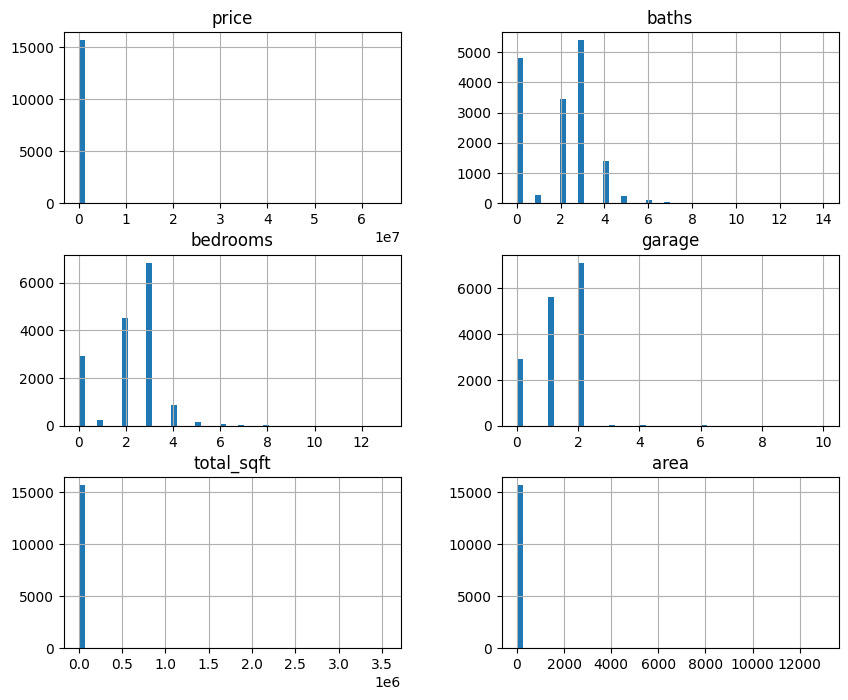

In [92]:
import matplotlib.pyplot as plt
df7.hist(bins=50, figsize=(10, 8))
plt.show()

In [93]:
df7['bedrooms'].unique()

array([ 2,  3,  4,  5,  0,  1,  6,  7,  8, 11,  9, 10, 13], dtype=int64)

In [94]:
df7[df7.bedrooms>5].count()

page_url      139
price         139
location      139
baths         139
bedrooms      139
garage        139
Property      139
total_sqft    139
area          139
dtype: int64

In [95]:
location_stats_beds_greater_then_5= df7[df7.bedrooms<=5]
location_stats_beds_greater_then_5

,page_url,price,location,baths,bedrooms,garage,Property,total_sqft,area
0,https://www.zameen.com/Property/islamabad_bhar...,12000,Bhara kahu,2,2,0.0,Upper Portion,1361,5
1,https://www.zameen.com/Property/islamabad_f_10...,70000,F-10,3,3,2.0,Upper Portion,5445,20
2,https://www.zameen.com/Property/islamabad_f_10...,75000,F-10,3,3,2.0,Upper Portion,5445,20
3,https://www.zameen.com/Property/bahria_town_ba...,40000,Bahria Town,3,3,1.0,Upper Portion,2722,10
4,https://www.zameen.com/Property/f_10_f_10_4_50...,80000,F-10,3,3,2.0,Upper Portion,5445,20
...,...,...,...,...,...,...,...,...,...
15704,https://www.graana.com/property/islamabad-g-10...,90000,G-10/4,3,3,1.0,House,1361,5
15705,https://www.graana.com/property/islamabad-g-10...,85000,G-10/1,3,3,1.0,House,1361,5
15706,https://www.graana.com/property/islamabad-g-10...,160000,G-10,5,5,2.0,House,3538,13
15707,https://www.graana.com/property/islamabad-f-10...,250000,F-10,4,4,1.0,House,499,1


In [96]:
df8=location_stats_beds_greater_then_5
df8.bedrooms.unique()

array([2, 3, 4, 5, 0, 1], dtype=int64)

In [97]:
location_stats_beds_greater_then_1 = df8[df8.bedrooms>0]
location_stats_beds_greater_then_1

,page_url,price,location,baths,bedrooms,garage,Property,total_sqft,area
0,https://www.zameen.com/Property/islamabad_bhar...,12000,Bhara kahu,2,2,0.0,Upper Portion,1361,5
1,https://www.zameen.com/Property/islamabad_f_10...,70000,F-10,3,3,2.0,Upper Portion,5445,20
2,https://www.zameen.com/Property/islamabad_f_10...,75000,F-10,3,3,2.0,Upper Portion,5445,20
3,https://www.zameen.com/Property/bahria_town_ba...,40000,Bahria Town,3,3,1.0,Upper Portion,2722,10
4,https://www.zameen.com/Property/f_10_f_10_4_50...,80000,F-10,3,3,2.0,Upper Portion,5445,20
...,...,...,...,...,...,...,...,...,...
15704,https://www.graana.com/property/islamabad-g-10...,90000,G-10/4,3,3,1.0,House,1361,5
15705,https://www.graana.com/property/islamabad-g-10...,85000,G-10/1,3,3,1.0,House,1361,5
15706,https://www.graana.com/property/islamabad-g-10...,160000,G-10,5,5,2.0,House,3538,13
15707,https://www.graana.com/property/islamabad-f-10...,250000,F-10,4,4,1.0,House,499,1


In [98]:
df9= location_stats_beds_greater_then_1
df9.bedrooms.unique()

array([2, 3, 4, 5, 1], dtype=int64)

In [99]:
df9.baths.unique()

array([ 2,  3,  4,  5,  0,  1,  8,  6,  7, 10], dtype=int64)

In [100]:
df9[df9.baths<1].count()

page_url      1867
price         1867
location      1867
baths         1867
bedrooms      1867
garage        1867
Property      1867
total_sqft    1867
area          1867
dtype: int64

In [101]:
statsBaths=df9[df9.baths>=1] 
statsBaths

,page_url,price,location,baths,bedrooms,garage,Property,total_sqft,area
0,https://www.zameen.com/Property/islamabad_bhar...,12000,Bhara kahu,2,2,0.0,Upper Portion,1361,5
1,https://www.zameen.com/Property/islamabad_f_10...,70000,F-10,3,3,2.0,Upper Portion,5445,20
2,https://www.zameen.com/Property/islamabad_f_10...,75000,F-10,3,3,2.0,Upper Portion,5445,20
3,https://www.zameen.com/Property/bahria_town_ba...,40000,Bahria Town,3,3,1.0,Upper Portion,2722,10
4,https://www.zameen.com/Property/f_10_f_10_4_50...,80000,F-10,3,3,2.0,Upper Portion,5445,20
...,...,...,...,...,...,...,...,...,...
15704,https://www.graana.com/property/islamabad-g-10...,90000,G-10/4,3,3,1.0,House,1361,5
15705,https://www.graana.com/property/islamabad-g-10...,85000,G-10/1,3,3,1.0,House,1361,5
15706,https://www.graana.com/property/islamabad-g-10...,160000,G-10,5,5,2.0,House,3538,13
15707,https://www.graana.com/property/islamabad-f-10...,250000,F-10,4,4,1.0,House,499,1


In [102]:
df9=statsBaths
df9.baths.unique()

array([ 2,  3,  4,  5,  1,  8,  6,  7, 10], dtype=int64)

In [103]:
statsbath=df9[df9.baths<6]
statsbath

,page_url,price,location,baths,bedrooms,garage,Property,total_sqft,area
0,https://www.zameen.com/Property/islamabad_bhar...,12000,Bhara kahu,2,2,0.0,Upper Portion,1361,5
1,https://www.zameen.com/Property/islamabad_f_10...,70000,F-10,3,3,2.0,Upper Portion,5445,20
2,https://www.zameen.com/Property/islamabad_f_10...,75000,F-10,3,3,2.0,Upper Portion,5445,20
3,https://www.zameen.com/Property/bahria_town_ba...,40000,Bahria Town,3,3,1.0,Upper Portion,2722,10
4,https://www.zameen.com/Property/f_10_f_10_4_50...,80000,F-10,3,3,2.0,Upper Portion,5445,20
...,...,...,...,...,...,...,...,...,...
15704,https://www.graana.com/property/islamabad-g-10...,90000,G-10/4,3,3,1.0,House,1361,5
15705,https://www.graana.com/property/islamabad-g-10...,85000,G-10/1,3,3,1.0,House,1361,5
15706,https://www.graana.com/property/islamabad-g-10...,160000,G-10,5,5,2.0,House,3538,13
15707,https://www.graana.com/property/islamabad-f-10...,250000,F-10,4,4,1.0,House,499,1


In [104]:
df9=statsbath
df9.baths.unique()

array([2, 3, 4, 5, 1], dtype=int64)

In [105]:
df9.location.unique()

array(['Bhara kahu', 'F-10', 'Bahria Town', 'F-11', 'F-8', 'DHA Defence',
       'Korang Road', 'Bani Gala', 'Ghauri Town', 'G-11', 'G-9', 'G-15',
       'E-11', 'National Police Foundation O-9', 'G-13', 'Alipur Farash',
       'FECHS', 'I-8', 'D-17', 'Soan Garden', 'F-7', 'Green Avenue',
       'CBR Town', 'D-12', 'H-13', 'G-14', 'B-17', 'Naval Anchorage',
       'I-10', 'Pakistan Town', 'F-6', '9th Avenue', 'G-10',
       'Korang Town', 'I-9', 'Tarnol', 'G-8', '7th Avenue', 'Rawal Town',
       'Madina Town', 'F-15', 'PWD Housing Scheme', 'River Garden', 'G-6',
       'D-18', 'Shehzad Town', 'Meherban Colony', 'Margalla Town', 'I-14',
       'G-16', 'G-7', 'E-7', 'Islamabad Expressway',
       'National Police Foundation', 'New Shakrial', 'E-14', 'F-17',
       'Gulshan-e-Khudadad', 'C-14', 'Chatha Bakhtawar', 'PWD Road',
       'Shahpur', 'Taramrri', 'Burma Town', 'PAF Tarnol', 'Murree Road',
       'Lehtarar Road', 'Koral Chowk', 'Gulberg', 'Kuri Road',
       'National Town', 'Kas

In [106]:
df9.location=df9.location.apply(lambda x:x.strip()) #removing the leading spaces or spaces at the end of location

location_stats=df9.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

C:\Users\92310\AppData\Local\Temp\ipykernel_4060\4020021338.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df9.location=df9.location.apply(lambda x:x.strip()) #removing the leading spaces or spaces at the end of location


location
I-8                       1079
Bahria Town Rawalpindi     811
E-11                       774
DHA Defence                725
G-13                       629
                          ... 
Dheri Hassanabad             1
Jinnah Colony                1
Jhangi Syedan                1
Jhang Bahtar Road            1
Clifton Township             1
Name: location, Length: 295, dtype: int64

In [107]:
location_stats_less_than_8= location_stats[location_stats<10]
location_stats_less_than_8

location
Muslim Town          9
PWD Road             9
9th Avenue           9
G-14/4               9
G-10/4               9
                    ..
Dheri Hassanabad     1
Jinnah Colony        1
Jhangi Syedan        1
Jhang Bahtar Road    1
Clifton Township     1
Name: location, Length: 224, dtype: int64

In [108]:
len(location_stats[location_stats>9])

71

In [109]:
df9.location = df9.location.apply(lambda x: 'other' if x in location_stats_less_than_8 else x)
len(df9.location.unique())

C:\Users\92310\AppData\Local\Temp\ipykernel_4060\2273416000.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df9.location = df9.location.apply(lambda x: 'other' if x in location_stats_less_than_8 else x)


72

In [110]:
df10=df9

In [111]:
df10= df10[~(df10.total_sqft/df10.bedrooms<150)]
df10.shape

(10683, 9)

In [112]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

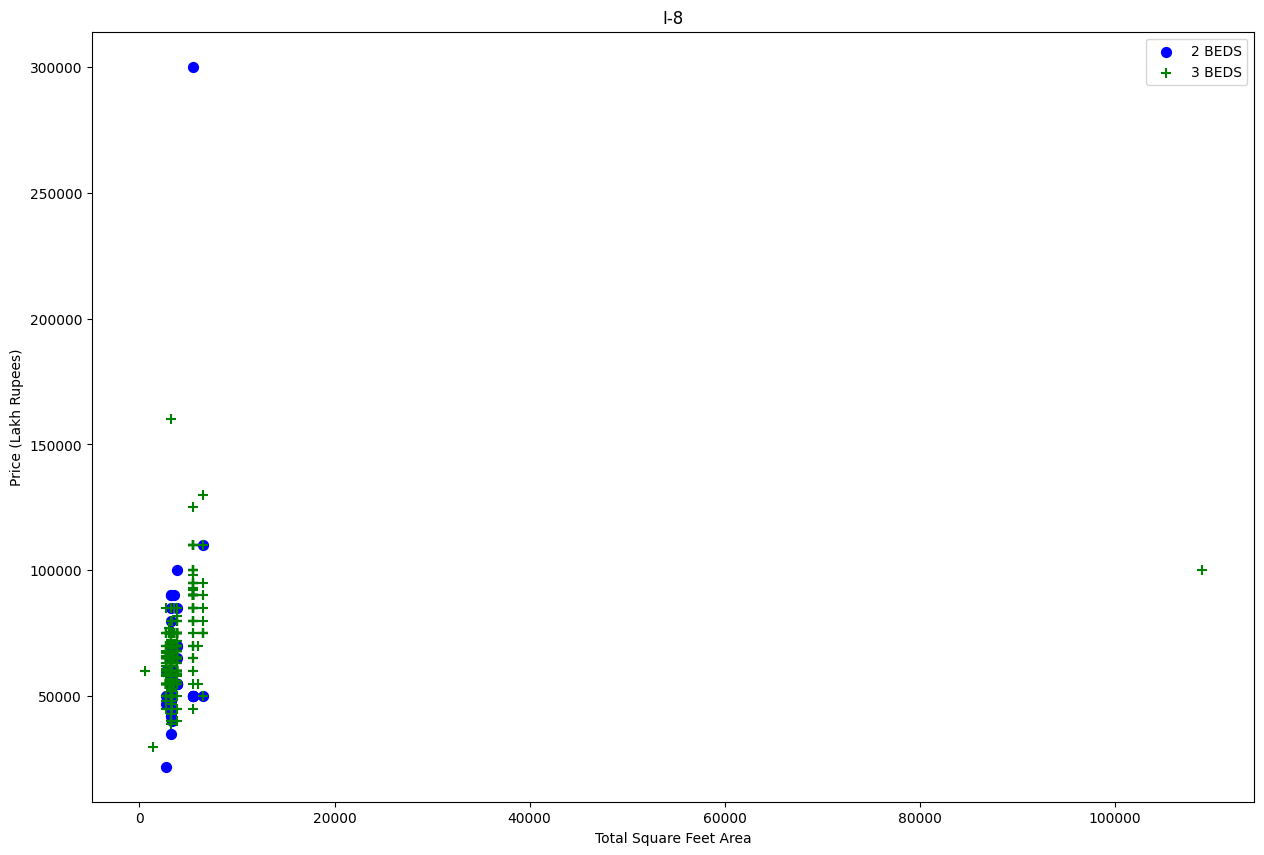

In [113]:
def plot_scatter_chart(df,location):
    bedrooms2 = df[(df.location==location) & (df.bedrooms==2)]
    bedrooms3 = df[(df.location==location) & (df.bedrooms==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bedrooms2.total_sqft,bedrooms2.price,color='blue',label='2 BEDS', s=50)
    plt.scatter(bedrooms3.total_sqft,bedrooms3.price,marker='+', color='green',label='3 BEDS', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df10,"I-8")

Text(0, 0.5, 'Count')

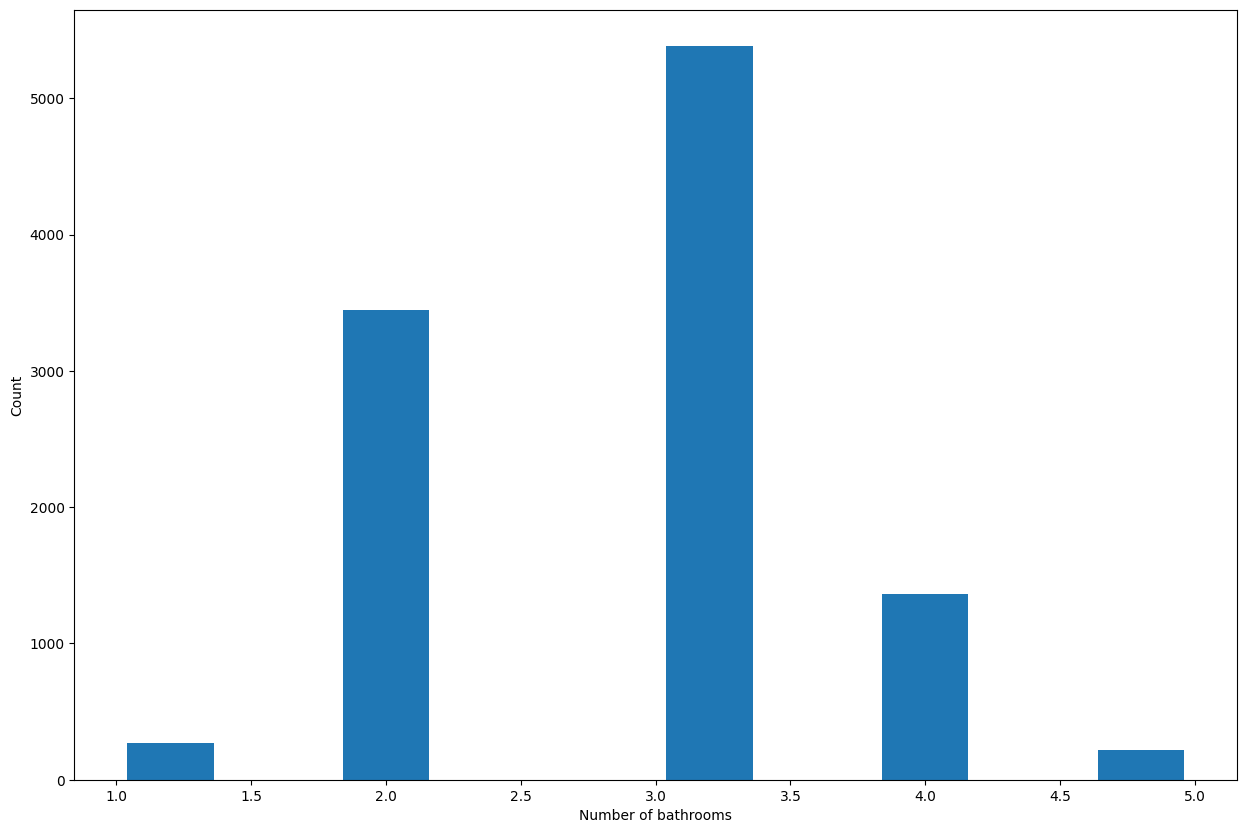

In [114]:
plt.hist(df10.baths,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

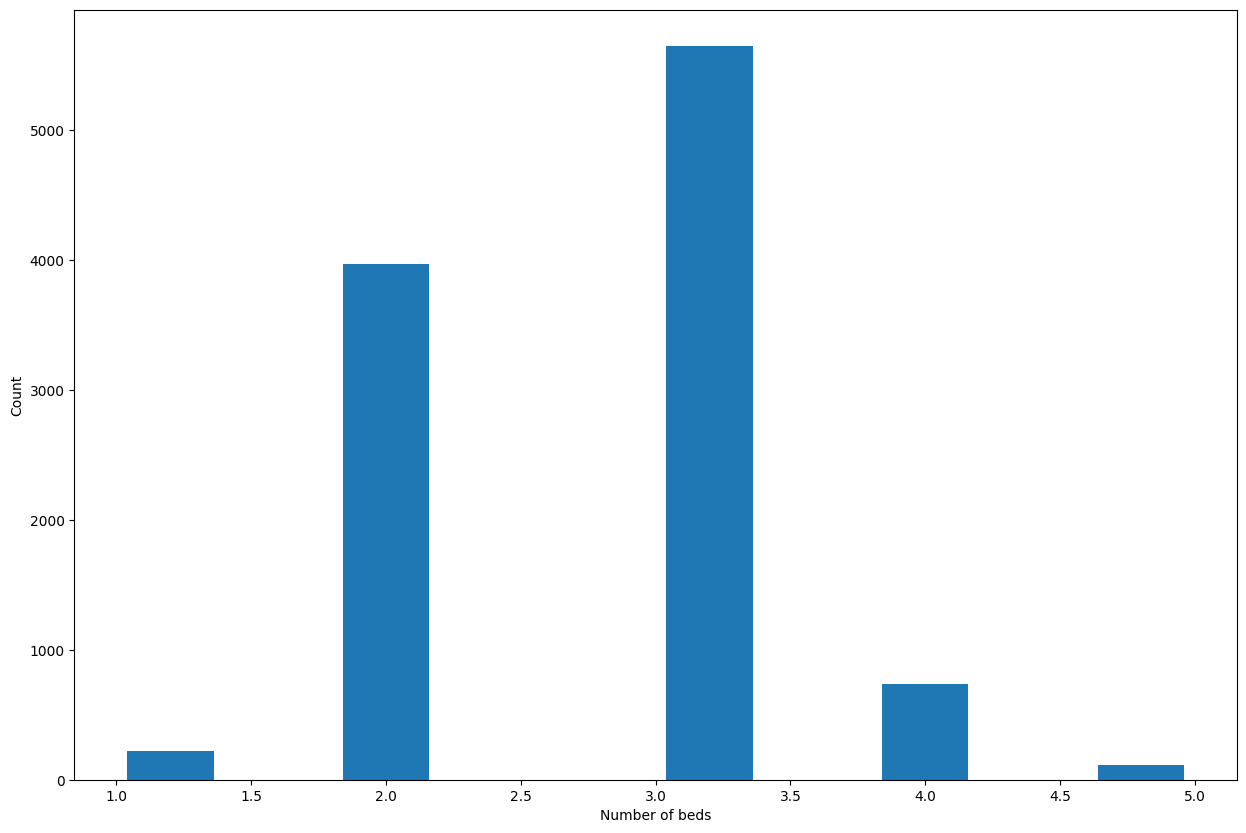

In [115]:
plt.hist(df10.bedrooms,rwidth=0.8)
plt.xlabel("Number of beds")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

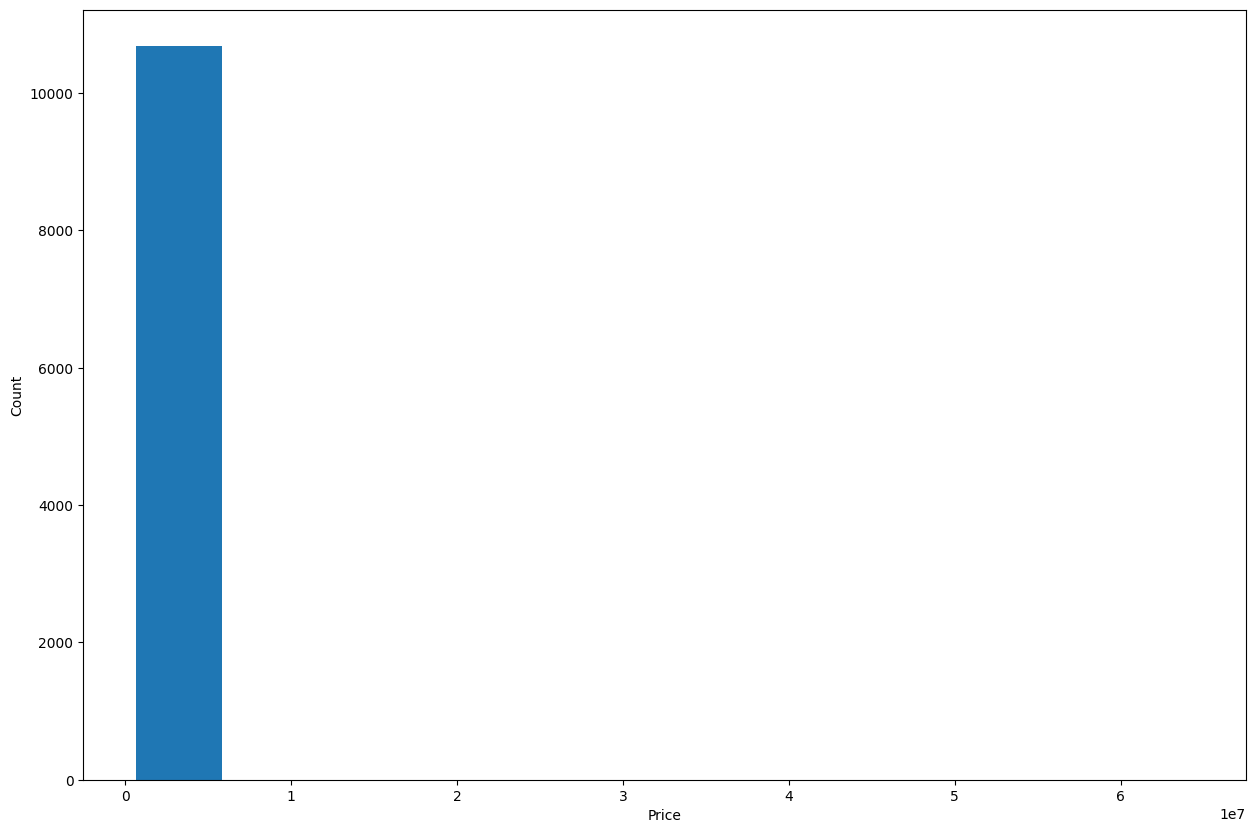

In [116]:
plt.hist(df10.price,rwidth=0.8)
plt.xlabel("Price")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

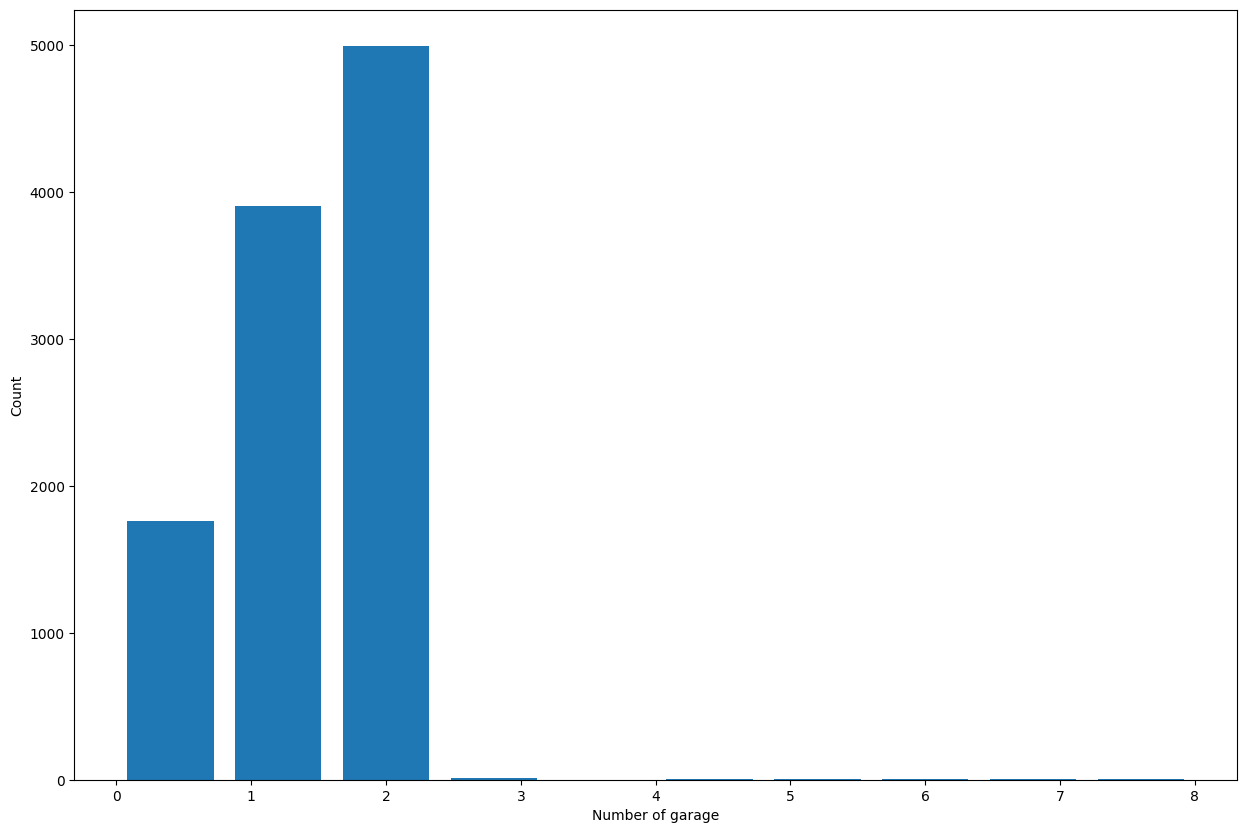

In [117]:
plt.hist(df10.garage,rwidth=0.8)
plt.xlabel("Number of garage")
plt.ylabel("Count")

In [118]:
statsGar=df10[df10.garage<3]
statsGar

,page_url,price,location,baths,bedrooms,garage,Property,total_sqft,area
0,https://www.zameen.com/Property/islamabad_bhar...,12000,Bhara kahu,2,2,0.0,Upper Portion,1361,5
1,https://www.zameen.com/Property/islamabad_f_10...,70000,F-10,3,3,2.0,Upper Portion,5445,20
2,https://www.zameen.com/Property/islamabad_f_10...,75000,F-10,3,3,2.0,Upper Portion,5445,20
3,https://www.zameen.com/Property/bahria_town_ba...,40000,Bahria Town,3,3,1.0,Upper Portion,2722,10
4,https://www.zameen.com/Property/f_10_f_10_4_50...,80000,F-10,3,3,2.0,Upper Portion,5445,20
...,...,...,...,...,...,...,...,...,...
15703,https://www.graana.com/property/islamabad-g-10...,90000,G-10,4,4,2.0,House,1361,5
15704,https://www.graana.com/property/islamabad-g-10...,90000,other,3,3,1.0,House,1361,5
15705,https://www.graana.com/property/islamabad-g-10...,85000,other,3,3,1.0,House,1361,5
15706,https://www.graana.com/property/islamabad-g-10...,160000,G-10,5,5,2.0,House,3538,13


In [119]:
df10=statsGar

In [120]:
df11 = df10[df10.bedrooms<=df10.baths+1]
df11.shape

(10596, 9)

In [121]:
df11.price.unique()

array([   12000,    70000,    75000,    40000,    80000,   130000,
          45000,    62000,    65000,   120000,    90000,    85000,
          95000,    30000,    60000,    43000,    32000,    23000,
          28000,    50000,    48000,    25000,   150000,    33000,
          15000,    88000,   140000,    29000,    27000,    55000,
          35000,    22000,    10000,    20000,   250000,   110000,
          18000,    37000,    24000,    26000,    42000,     8000,
          10500,    58000,    19000,    34000,    56000,   115000,
          44000,    74000,    31000,   108000,   100000,    38000,
          36000,    14000,    17000,    39990,    57000,    53000,
          16000,    39000,    13000,    21000,   300000,   125000,
          11000,   170000,    47000,    54000,   175000,  4000000,
          37500,    33500,    49000,    46000,    65500,    25500,
         160000,    63000,    82000,   180000,    41000,    72000,
          36500,   135000,    73000,    13500,   200000,    77

In [122]:
statsprice=df11[df11.price<150000]
statsprice

,page_url,price,location,baths,bedrooms,garage,Property,total_sqft,area
0,https://www.zameen.com/Property/islamabad_bhar...,12000,Bhara kahu,2,2,0.0,Upper Portion,1361,5
1,https://www.zameen.com/Property/islamabad_f_10...,70000,F-10,3,3,2.0,Upper Portion,5445,20
2,https://www.zameen.com/Property/islamabad_f_10...,75000,F-10,3,3,2.0,Upper Portion,5445,20
3,https://www.zameen.com/Property/bahria_town_ba...,40000,Bahria Town,3,3,1.0,Upper Portion,2722,10
4,https://www.zameen.com/Property/f_10_f_10_4_50...,80000,F-10,3,3,2.0,Upper Portion,5445,20
...,...,...,...,...,...,...,...,...,...
15702,https://www.graana.com/property/islamabad-g-10...,70000,other,3,3,1.0,House,1796,6
15703,https://www.graana.com/property/islamabad-g-10...,90000,G-10,4,4,2.0,House,1361,5
15704,https://www.graana.com/property/islamabad-g-10...,90000,other,3,3,1.0,House,1361,5
15705,https://www.graana.com/property/islamabad-g-10...,85000,other,3,3,1.0,House,1361,5


In [123]:
df11=statsprice
df11.price.unique()

array([ 12000,  70000,  75000,  40000,  80000, 130000,  45000,  62000,
        65000, 120000,  90000,  85000,  95000,  30000,  60000,  43000,
        32000,  23000,  28000,  50000,  48000,  25000,  33000,  15000,
        88000, 140000,  29000,  27000,  55000,  35000,  22000,  10000,
        20000, 110000,  18000,  37000,  24000,  26000,  42000,   8000,
        10500,  58000,  19000,  34000,  56000, 115000,  44000,  74000,
        31000, 108000, 100000,  38000,  36000,  14000,  17000,  39990,
        57000,  53000,  16000,  39000,  13000,  21000, 125000,  11000,
        47000,  54000,  37500,  33500,  49000,  46000,  65500,  25500,
        63000,  82000,  41000,  72000,  36500, 135000,  73000,  13500,
        77000,  76000,  68000,  87000,  52000,  93000, 105000,  59000,
        27500,  78000,  99000,  35500,  83000,  92000,  17500,  61000,
        67000,  71000,  72500,  69000,  89000,  66000,  23500,  26500,
        20500,  16500,  15500,  40500,  49990,   9000,  18500,  19500,
      

In [124]:
df11.total_sqft.unique()

array([   1361,    5445,    2722,    7078,    3811,   10890,   16335,
          6534,    3267,    1633,    1905,    3539,     680,    3865,
          2178,    2041,    1197,    4628,     544,     598,    1089,
          2994,    2450,    2531,    3321,    4846,   19057,    3620,
           816,    5989,    4356,    3103,    4083,    1824,    8712,
          3375,    5172,    3021,    1225,    4900, 2722510,    4764,
           735,    2123,     980,    1796,     789,    5308,   11979,
         13068,    1334,    1932,    3920,  490051,   19602,   16879,
         34848,     925,    2668,  108900,   54450,   43560,    8167,
          4709,  272251,     490,   49005,    2423,    7623,    2232,
          2314,    1007,    1170,    3158,     952,    9256,     898,
          2286,    1034,   27225,   21780,    5444,    4899,    7077,
          3266,    2177,     999,    3810,    1088,     499,    4355,
           799,     399,     665,    2449,    1769,    1143,    1306,
          1252,    2

In [125]:
statssqft=df11[df11.total_sqft<4000]
statssqft

,page_url,price,location,baths,bedrooms,garage,Property,total_sqft,area
0,https://www.zameen.com/Property/islamabad_bhar...,12000,Bhara kahu,2,2,0.0,Upper Portion,1361,5
3,https://www.zameen.com/Property/bahria_town_ba...,40000,Bahria Town,3,3,1.0,Upper Portion,2722,10
11,https://www.zameen.com/Property/islamabad_kora...,62000,other,5,5,2.0,Upper Portion,3811,14
20,https://www.zameen.com/Property/islamabad_ghau...,30000,Ghauri Town,3,3,1.0,Upper Portion,2722,10
23,https://www.zameen.com/Property/islamabad_g_11...,65000,G-11,4,4,2.0,Upper Portion,3267,12
...,...,...,...,...,...,...,...,...,...
15702,https://www.graana.com/property/islamabad-g-10...,70000,other,3,3,1.0,House,1796,6
15703,https://www.graana.com/property/islamabad-g-10...,90000,G-10,4,4,2.0,House,1361,5
15704,https://www.graana.com/property/islamabad-g-10...,90000,other,3,3,1.0,House,1361,5
15705,https://www.graana.com/property/islamabad-g-10...,85000,other,3,3,1.0,House,1361,5


In [126]:
df11=statssqft
df11.head()

,page_url,price,location,baths,bedrooms,garage,Property,total_sqft,area
0,https://www.zameen.com/Property/islamabad_bhar...,12000,Bhara kahu,2,2,0.0,Upper Portion,1361,5
3,https://www.zameen.com/Property/bahria_town_ba...,40000,Bahria Town,3,3,1.0,Upper Portion,2722,10
11,https://www.zameen.com/Property/islamabad_kora...,62000,other,5,5,2.0,Upper Portion,3811,14
20,https://www.zameen.com/Property/islamabad_ghau...,30000,Ghauri Town,3,3,1.0,Upper Portion,2722,10
23,https://www.zameen.com/Property/islamabad_g_11...,65000,G-11,4,4,2.0,Upper Portion,3267,12


Text(0, 0.5, 'Count')

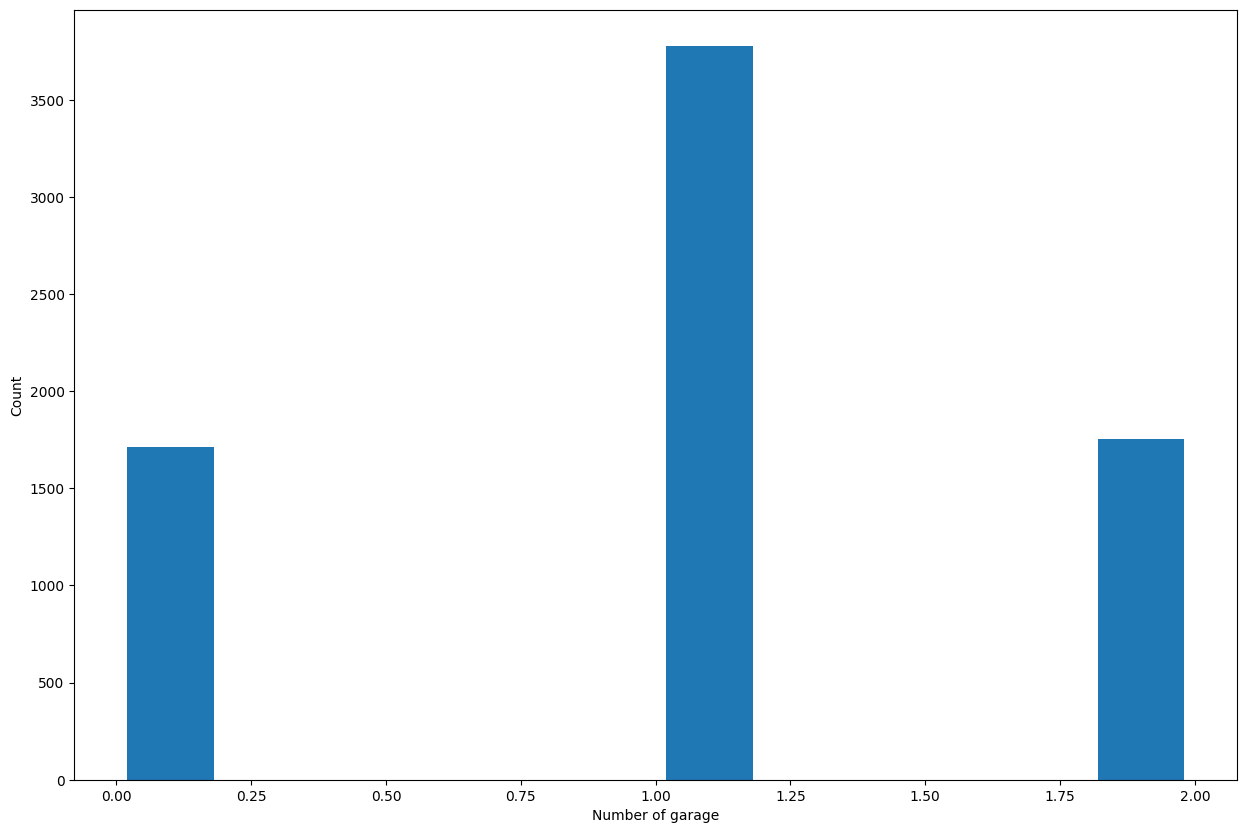

In [127]:
plt.hist(df11.garage,rwidth=0.8)
plt.xlabel("Number of garage")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

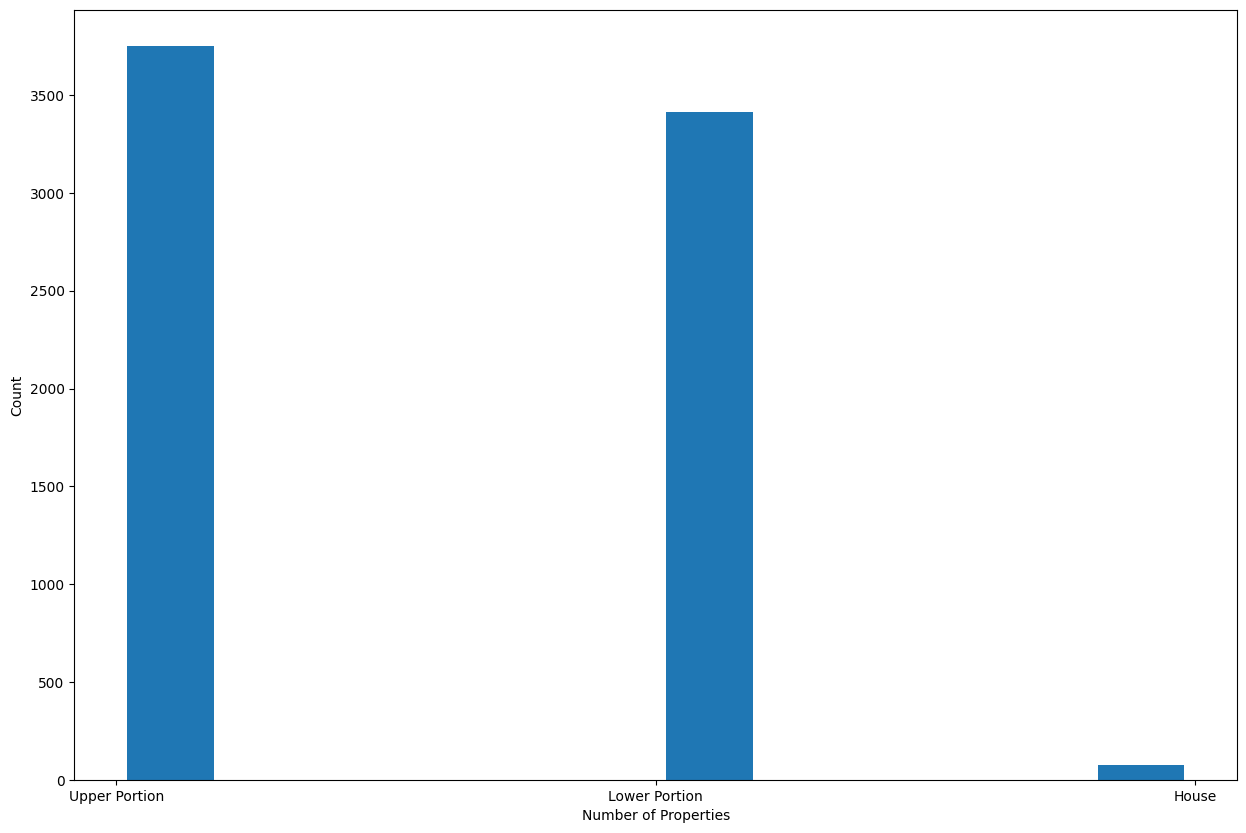

In [128]:
plt.hist(df11.Property,rwidth=0.8)
plt.xlabel("Number of Properties")
plt.ylabel("Count")

In [129]:
df11[ df11[ 'Property' ].str.contains( 'House')==False ]

,page_url,price,location,baths,bedrooms,garage,Property,total_sqft,area
0,https://www.zameen.com/Property/islamabad_bhar...,12000,Bhara kahu,2,2,0.0,Upper Portion,1361,5
3,https://www.zameen.com/Property/bahria_town_ba...,40000,Bahria Town,3,3,1.0,Upper Portion,2722,10
11,https://www.zameen.com/Property/islamabad_kora...,62000,other,5,5,2.0,Upper Portion,3811,14
20,https://www.zameen.com/Property/islamabad_ghau...,30000,Ghauri Town,3,3,1.0,Upper Portion,2722,10
23,https://www.zameen.com/Property/islamabad_g_11...,65000,G-11,4,4,2.0,Upper Portion,3267,12
...,...,...,...,...,...,...,...,...,...
15420,https://www.graana.com/property/islamabad-g-10...,100000,other,3,3,1.0,Lower Portion,2722,10
15421,https://www.graana.com/property/islamabad-bani...,19000,Bani Gala,1,2,1.0,Lower Portion,1361,5
15422,https://www.graana.com/property/islamabad-d-12...,29000,D-12,2,2,1.0,Lower Portion,1088,4
15423,https://www.graana.com/property/islamabad-pwd-...,40000,PWD Housing Scheme,3,3,1.0,Lower Portion,3266,12


In [130]:
df11.location=df11.location.apply(lambda x:x.strip()) #removing the leading spaces or spaces at the end of location

location_stats1=df11.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats1

C:\Users\92310\AppData\Local\Temp\ipykernel_4060\1560908696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11.location=df11.location.apply(lambda x:x.strip()) #removing the leading spaces or spaces at the end of location


location
I-8                           933
G-13                          582
Bahria Town Rawalpindi        543
I-10                          497
other                         429
                             ... 
F-10                            6
National Police Foundation      5
F-8                             5
F-6                             3
DHA Phase 2                     1
Name: location, Length: 70, dtype: int64

In [131]:
loca=location_stats1[location_stats1<10]
loca

location
G-16                          9
New Lalazar                   9
F-15                          9
7th Avenue                    7
F-7                           6
F-10                          6
National Police Foundation    5
F-8                           5
F-6                           3
DHA Phase 2                   1
Name: location, dtype: int64

In [132]:
df11.location = df11.location.apply(lambda x: 'other' if x in loca else x)
len(df11.location.unique())

C:\Users\92310\AppData\Local\Temp\ipykernel_4060\4010697164.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11.location = df11.location.apply(lambda x: 'other' if x in loca else x)


60

In [133]:
df11.Property.unique()

array(['Upper Portion', 'Lower Portion', 'House'], dtype=object)

In [134]:
df11=df11[ df11[ 'Property' ].str.contains( 'House')==False ]

In [135]:
df11.Property.unique()

array(['Upper Portion', 'Lower Portion'], dtype=object)

In [136]:
def prop_type(x):
    if x=='Upper Portion':
        return 1
    if x=='Lower Portion':
        return 0
    

In [137]:
df11['Portion']= df11['Property'].apply(prop_type).astype(int)
df11.head(10)

C:\Users\92310\AppData\Local\Temp\ipykernel_4060\3458924532.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11['Portion']= df11['Property'].apply(prop_type).astype(int)


,page_url,price,location,baths,bedrooms,garage,Property,total_sqft,area,Portion
0,https://www.zameen.com/Property/islamabad_bhar...,12000,Bhara kahu,2,2,0.0,Upper Portion,1361,5,1
3,https://www.zameen.com/Property/bahria_town_ba...,40000,Bahria Town,3,3,1.0,Upper Portion,2722,10,1
11,https://www.zameen.com/Property/islamabad_kora...,62000,other,5,5,2.0,Upper Portion,3811,14,1
20,https://www.zameen.com/Property/islamabad_ghau...,30000,Ghauri Town,3,3,1.0,Upper Portion,2722,10,1
23,https://www.zameen.com/Property/islamabad_g_11...,65000,G-11,4,4,2.0,Upper Portion,3267,12,1
24,https://www.zameen.com/Property/islamabad_g_11...,60000,G-11,4,4,2.0,Upper Portion,3267,12,1
25,https://www.zameen.com/Property/g_9_g_9_1_1st_...,43000,G-9,2,3,1.0,Upper Portion,1633,6,1
26,https://www.zameen.com/Property/g_15_g_15_1_12...,32000,G-15,4,3,2.0,Upper Portion,3267,12,1
27,https://www.zameen.com/Property/islamabad_bani...,30000,Bani Gala,3,3,2.0,Upper Portion,3267,12,1
28,https://www.zameen.com/Property/g_15_g_15_1_g_...,45000,G-15,4,3,2.0,Upper Portion,3267,12,1


In [138]:
df11.Portion.unique()

array([1, 0])

In [139]:
df11=df11.drop(['Property','area'], axis=1)
df11.head()

,page_url,price,location,baths,bedrooms,garage,total_sqft,Portion
0,https://www.zameen.com/Property/islamabad_bhar...,12000,Bhara kahu,2,2,0.0,1361,1
3,https://www.zameen.com/Property/bahria_town_ba...,40000,Bahria Town,3,3,1.0,2722,1
11,https://www.zameen.com/Property/islamabad_kora...,62000,other,5,5,2.0,3811,1
20,https://www.zameen.com/Property/islamabad_ghau...,30000,Ghauri Town,3,3,1.0,2722,1
23,https://www.zameen.com/Property/islamabad_g_11...,65000,G-11,4,4,2.0,3267,1


In [140]:
df11['Garage']=df11['garage'].astype(int)
df11.head()

,page_url,price,location,baths,bedrooms,garage,total_sqft,Portion,Garage
0,https://www.zameen.com/Property/islamabad_bhar...,12000,Bhara kahu,2,2,0.0,1361,1,0
3,https://www.zameen.com/Property/bahria_town_ba...,40000,Bahria Town,3,3,1.0,2722,1,1
11,https://www.zameen.com/Property/islamabad_kora...,62000,other,5,5,2.0,3811,1,2
20,https://www.zameen.com/Property/islamabad_ghau...,30000,Ghauri Town,3,3,1.0,2722,1,1
23,https://www.zameen.com/Property/islamabad_g_11...,65000,G-11,4,4,2.0,3267,1,2


In [141]:
df11=df11.drop('garage', axis=1)
df11.head(2)

,page_url,price,location,baths,bedrooms,total_sqft,Portion,Garage
0,https://www.zameen.com/Property/islamabad_bhar...,12000,Bhara kahu,2,2,1361,1,0
3,https://www.zameen.com/Property/bahria_town_ba...,40000,Bahria Town,3,3,2722,1,1


In [142]:
df11=df11.drop('page_url', axis=1)
df11.head(2)

,price,location,baths,bedrooms,total_sqft,Portion,Garage
0,12000,Bhara kahu,2,2,1361,1,0
3,40000,Bahria Town,3,3,2722,1,1


In [143]:
header_names=['Price','House_location','baths','beds','total_sqft','portion','garage']
df11.to_csv('../Output/data2forrent.csv')

In [144]:
df11=pd.read_csv("../Output/data2forrent.csv",header=None,skiprows=1, names=header_names)
df11.head()

,Price,House_location,baths,beds,total_sqft,portion,garage
0,12000,Bhara kahu,2,2,1361,1,0
3,40000,Bahria Town,3,3,2722,1,1
11,62000,other,5,5,3811,1,2
20,30000,Ghauri Town,3,3,2722,1,1
23,65000,G-11,4,4,3267,1,2


In [145]:
df11.to_csv('./finalrent.csv')

In [146]:
dummies = pd.get_dummies(df11.House_location)
dummies.head(3)

,Adiala Road,Afshan Colony,Airport Housing Society,B-17,Bahria Town,Bahria Town Rawalpindi,Bani Gala,Bhara kahu,CBR Town,Chaklala Scheme,...,PWD Housing Scheme,Pakistan Town,Peshawar Road,Range Road,Satellite Town,Shalley Valley,Shehzad Town,Soan Garden,Westridge,other
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [147]:
df12 = pd.concat([df11,dummies.drop('other',axis='columns')],axis='columns')
df12.head()

,Price,House_location,baths,beds,total_sqft,portion,garage,Adiala Road,Afshan Colony,Airport Housing Society,...,Naval Anchorage,PWD Housing Scheme,Pakistan Town,Peshawar Road,Range Road,Satellite Town,Shalley Valley,Shehzad Town,Soan Garden,Westridge
0,12000,Bhara kahu,2,2,1361,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,40000,Bahria Town,3,3,2722,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,62000,other,5,5,3811,1,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,30000,Ghauri Town,3,3,2722,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,65000,G-11,4,4,3267,1,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [148]:
df13 = df12.drop('House_location',axis='columns')
df13.head(2)

,Price,baths,beds,total_sqft,portion,garage,Adiala Road,Afshan Colony,Airport Housing Society,B-17,...,Naval Anchorage,PWD Housing Scheme,Pakistan Town,Peshawar Road,Range Road,Satellite Town,Shalley Valley,Shehzad Town,Soan Garden,Westridge
0,12000,2,2,1361,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,40000,3,3,2722,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [149]:
X = df13.drop(['Price'],axis='columns')
X.head(3)

,baths,beds,total_sqft,portion,garage,Adiala Road,Afshan Colony,Airport Housing Society,B-17,Bahria Town,...,Naval Anchorage,PWD Housing Scheme,Pakistan Town,Peshawar Road,Range Road,Satellite Town,Shalley Valley,Shehzad Town,Soan Garden,Westridge
0,2,2,1361,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,2722,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
11,5,5,3811,1,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [150]:
y=df13.Price

In [151]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [152]:
X_train.columns

Index(['baths', 'beds', 'total_sqft', 'portion', 'garage', 'Adiala Road',
       'Afshan Colony', 'Airport Housing Society', 'B-17', 'Bahria Town',
       'Bahria Town Rawalpindi', 'Bani Gala', 'Bhara kahu', 'CBR Town',
       'Chaklala Scheme', 'Chatha Bakhtawar', 'D-12', 'D-17', 'DHA Defence',
       'Dhok Kashmirian', 'E-11', 'F-11', 'F-17', 'FECHS', 'G-10', 'G-11',
       'G-13', 'G-13/1', 'G-13/2', 'G-13/3', 'G-13/4', 'G-14', 'G-15', 'G-6',
       'G-8', 'G-9', 'Ghauri Town', 'Green Avenue', 'Gulraiz Housing Scheme',
       'Gulshan Abad', 'Gulzar-e-Quaid Housing Society', 'H-13', 'I-10',
       'I-14', 'I-8', 'I-9', 'Khayaban-e-Sir Syed', 'Korang Town', 'Lalazar',
       'Lehtarar Road', 'Margalla Town', 'Media Town', 'Misryal Road',
       'National Police Foundation O-9', 'Naval Anchorage',
       'PWD Housing Scheme', 'Pakistan Town', 'Peshawar Road', 'Range Road',
       'Satellite Town', 'Shalley Valley', 'Shehzad Town', 'Soan Garden',
       'Westridge'],
      dtype='objec

In [153]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train )
lr_clf.score(X_test,y_test)

0.6536763163509715

In [154]:
from sklearn.tree import DecisionTreeRegressor
decision=DecisionTreeRegressor(random_state=0)
decision.fit(X_train,y_train)
decision.score(X_test,y_test)

0.6720691511070521

In [155]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=200, random_state=0)

regressor.fit(X_train,y_train)
regressor.score(X_test,y_test)

0.7032883688879413

In [156]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=10)

LA=cross_val_score(LinearRegression(), X, y, cv=cv)
LA

array([0.68799267, 0.70456202, 0.70214691, 0.67406544, 0.67538882,
       0.65314693, 0.68125389, 0.69161646, 0.67131436, 0.69466326])

In [157]:
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)

RFR=cross_val_score(RandomForestRegressor(),X, y, cv=cv, n_jobs = -1, verbose = 2)
RFR

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    5.2s remaining:    7.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.2s finished


array([0.73299398, 0.73181848, 0.73263864, 0.71066396, 0.72556492])

In [158]:
from sklearn.svm import SVR
skr = SVR(kernel = 'linear')
skr.fit(X_train, y_train)
skr.score(X_test,y_test)

0.3195113266130408

In [160]:
from sklearn import ensemble
clf=ensemble.GradientBoostingRegressor(n_estimators=200, max_depth=5, min_samples_split=3, loss='ls')
clf.fit(X_train, y_train)
clf.score(X_test,y_test)

InvalidParameterError: The 'loss' parameter of GradientBoostingRegressor must be a str among {'absolute_error', 'squared_error', 'huber', 'quantile'}. Got 'ls' instead.

In [161]:
regressor = RandomForestRegressor(n_estimators=300, random_state=0, max_samples=2500, bootstrap=True,max_features=40)

regressor.fit(X_train,y_train)
regressor.score(X_test,y_test)

0.7207692382952049

In [162]:
X.columns

Index(['baths', 'beds', 'total_sqft', 'portion', 'garage', 'Adiala Road',
       'Afshan Colony', 'Airport Housing Society', 'B-17', 'Bahria Town',
       'Bahria Town Rawalpindi', 'Bani Gala', 'Bhara kahu', 'CBR Town',
       'Chaklala Scheme', 'Chatha Bakhtawar', 'D-12', 'D-17', 'DHA Defence',
       'Dhok Kashmirian', 'E-11', 'F-11', 'F-17', 'FECHS', 'G-10', 'G-11',
       'G-13', 'G-13/1', 'G-13/2', 'G-13/3', 'G-13/4', 'G-14', 'G-15', 'G-6',
       'G-8', 'G-9', 'Ghauri Town', 'Green Avenue', 'Gulraiz Housing Scheme',
       'Gulshan Abad', 'Gulzar-e-Quaid Housing Society', 'H-13', 'I-10',
       'I-14', 'I-8', 'I-9', 'Khayaban-e-Sir Syed', 'Korang Town', 'Lalazar',
       'Lehtarar Road', 'Margalla Town', 'Media Town', 'Misryal Road',
       'National Police Foundation O-9', 'Naval Anchorage',
       'PWD Housing Scheme', 'Pakistan Town', 'Peshawar Road', 'Range Road',
       'Satellite Town', 'Shalley Valley', 'Shehzad Town', 'Soan Garden',
       'Westridge'],
      dtype='objec

In [163]:
def predict_price(House_location,total_sqft,baths,beds,portion,garage):    
    loc_index = np.where(X.columns==House_location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = baths
    x[1] = beds
    x[2] = total_sqft
    x[3] = portion
    x[4] = garage
   
   
    if loc_index >= 0:
        x[loc_index] = 1
        if x[0]>=1:
            if x[1]>=1:
                if (x[2] > 0) &  (x[2] < 4500):
                    return regressor.predict([x])[0]
                else:
                    print("Invalid Input for Square foot. It must be greater then 0 and less then 60000")
            else:
                print("Invalid Input for beds")
        else:
            print("Invald Input for baths")
    else:
        print("Your Typed Location doesn't Exist")

In [164]:
predict_price('Ghauri Town',1000,2,3,0,1)

c:\Users\92310\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


33303.657142857155

In [166]:
import pickle
with open('./islamabad_rent_a_house_model.pickle','wb') as f:
    pickle.dump(regressor,f)

In [262]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("./columns.json","w") as f:
    f.write(json.dumps(columns))